# data colecting

In [34]:
!pip install datasets

In [35]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("divarofficial/real_estate_ads")

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\asus\.cache\huggingface\hub\datasets--divarofficial--real_estate_ads. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 1000000/1000000 [00:19<00:00, 51957.80 exam

In [48]:
df = ds["train"].to_pandas()

df.to_csv("divar.csv")

# install pacage

In [ ]:
#!pip install seaborn
#!pip install datasets
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
!pip install scikit-learn






# all import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import barplot
#from sklearn.preprocessing import LabelEncoder

In [ ]:
#df = pd.read_csv("divar.csv")

KeyboardInterrupt: 

# Data Cleaning


## drop Columns

اطلاعاتی مثل شماره گذاری و نام محله و لوکشن ها مثل طول و عرض و شعاع موقعیت مکانی , تعداد واحد در هر طبقه و جنس کف  بخاطر بی اهمیت بودن حضو شدن
 ظرفیت نفرات عادی برایه هر نفر و ظرفیت نفر اضافه و  قیمت هر نفر اضافه برایه اجاره روزانه و اجاره به افراد مجرد بخاطر کمبود اطلاعات و احتمال دستکاری از طرف شخض مشتری حضو گردیدن 
 سند تجاری دارد یا نه بخاطر کمبود و پخش بودن اطلاعات و نوع تحقیق حضو میشود
 و قیمت اجاره در روز هایه عادی خاص و اخر هفته به علت کمبود شدید اطلاعات و اختلاف زیاد با هم حضو گردیدند 
 اب برق گاز هک فقط زمین ها ندارن که اونا عملا لوله کشی و یا سیم کشی نشده 
 rent_price_on_regular_days و دو ستون مشابه بخاطر خالی بودن 99 درصد اطلاعات


In [7]:
df = pd.read_csv("divar.csv")

df = df.drop(columns=['rent_price_at_weekends','rent_price_on_special_days','rent_price_on_regular_days',
'has_water','has_gas','has_electricity','cost_per_extra_person','floor_material','unit_per_floor',
'has_business_deed','Unnamed: 0','neighborhood_slug','regular_person_capacity','extra_person_capacity',
'location_latitude','location_longitude','location_radius','rent_to_single'])

pd.DataFrame(df)
df.info()

C:\Users\asus\AppData\Local\Temp\ipykernel_4420\2417261937.py:1: DtypeWarning: Columns (27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("divar.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cat2_slug                1000000 non-null  object 
 1   cat3_slug                999999 non-null   object 
 2   city_slug                999998 non-null   object 
 3   created_at_month         1000000 non-null  object 
 4   user_type                288882 non-null   object 
 5   description              1000000 non-null  object 
 6   title                    999946 non-null   object 
 7   rent_mode                352994 non-null   object 
 8   rent_value               351322 non-null   float64
 9   rent_type                103961 non-null   object 
 10  price_mode               573606 non-null   object 
 11  price_value              568346 non-null   float64
 12  credit_mode              352994 non-null   object 
 13  credit_value             352095 non-null   

## fill nun 


### cheking

In [23]:
print(df.isnull().sum())

cat2_slug                  0
cat3_slug                  0
city_slug                  0
created_at_month           0
user_type                  0
description                0
title                      0
rent_mode                  0
rent_value                 0
rent_type                  0
price_mode                 0
price_value                0
credit_mode                0
credit_value               0
rent_credit_transform      0
transformable_price        0
transformable_credit       0
transformed_credit         0
transformable_rent         0
transformed_rent           0
land_size                  0
building_size              0
deed_type                  0
floor                      0
rooms_count                0
total_floors_count         0
has_balcony                0
has_elevator               0
has_warehouse              0
has_parking                0
construction_year          0
is_rebuilt                 0
has_warm_water_provider    0
has_heating_system         0
has_cooling_sy

In [66]:
print(df['has_restroom'].unique())

[False  True]


In [67]:
df['has_restroom'].value_counts()

has_restroom
False    593715
True     406285
Name: count, dtype: int64

In [6]:
print(df['rooms_count'].unique())

['سه' 'یک' 'دو' 'بدون اتاق' nan 'چهار' 'پنج یا بیشتر']


### 1. پر کردن مقادیر خالی categorical با mode

In [8]:
categorical_columns = ['cat3_slug', 'city_slug', 'price_mode', 'deed_type', 
                      'building_direction', 'property_type']

for col in categorical_columns:
    mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
    df[col] = df[col].fillna(mode_value)


### 2. پر کردن مقادیر خالی numerical با median

In [9]:
# دوتا ستون زیر مقادیرشون یا به اعداد فارسیه و یا اعداد به حروف نوشته شدس ابتدا باید انهارا درست کرد 
# تبدیل مقادیر فارسی به انگلیسی برای rooms_count
rooms_mapping = {
    'بدون اتاق': 0,
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار': 4,
    'پنج یا بیشتر': 5
}

df['rooms_count'] = df['rooms_count'].map(rooms_mapping)

# تبدیل سال‌های فارسی به انگلیسی برای construction_year
year_mapping = {
    'قبل از ۱۳۷۰': 1369,  # یا هر سال مناسب
    '۱۳۷۰': 1370,
    '۱۳۷۱': 1371,
    '۱۳۷۲': 1372,
    '۱۳۷۳': 1373,
    '۱۳۷۴': 1374,
    '۱۳۷۵': 1375,
    '۱۳۷۶': 1376,
    '۱۳۷۷': 1377,
    '۱۳۷۸': 1378,
    '۱۳۷۹': 1379,
    '۱۳۸۰': 1380,
    '۱۳۸۱': 1381,
    '۱۳۸۲': 1382,
    '۱۳۸۳': 1383,
    '۱۳۸۴': 1384,
    '۱۳۸۵': 1385,
    '۱۳۸۶': 1386,
    '۱۳۸۷': 1387,
    '۱۳۸۸': 1388,
    '۱۳۸۹': 1389,
    '۱۳۹۰': 1390,
    '۱۳۹۱': 1391,
    '۱۳۹۲': 1392,
    '۱۳۹۳': 1393,
    '۱۳۹۴': 1394,
    '۱۳۹۵': 1395,
    '۱۳۹۶': 1396,
    '۱۳۹۷': 1397,
    '۱۳۹۸': 1398,
    '۱۳۹۹': 1399,
    '۱۴۰۰': 1400,
    '۱۴۰۱': 1401,
    '۱۴۰۲': 1402,
    '۱۴۰۳': 1403
}

df['construction_year'] = df['construction_year'].map(year_mapping)

In [10]:
numerical_columns = ['rent_value', 'price_value', 'credit_value', 'transformable_credit',
                    'transformed_credit', 'transformable_rent', 'transformed_rent',
                    'land_size', 'building_size', 'floor', 'rooms_count', 
                    'total_floors_count', 'construction_year']

for col in numerical_columns:
    # اول ستون رو به numeric تبدیل کن
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # بعد median بگیر
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)



### 3. پر کردن امکانات با False

In [11]:

boolean_columns = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
                  'is_rebuilt', 'has_warm_water_provider', 'has_heating_system',
                  'has_cooling_system', 'has_restroom', 'has_security_guard',
                  'has_barbecue', 'has_pool', 'has_jacuzzi', 'has_sauna','rent_credit_transform',
                  'transformable_price']

for col in boolean_columns:
    df[col] = df[col].fillna(False)
    print(col,df[col].unique())


has_balcony [False 'true' 'false' 'unselect' True]
has_elevator [False  True]
has_warehouse [False  True]
has_parking [False  True]


C:\Users\asus\AppData\Local\Temp\ipykernel_4420\44314438.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)


is_rebuilt [False  True]
has_warm_water_provider [False 'package' 'water_heater' 'powerhouse' 'unselect']
has_heating_system [False 'shoofaj' 'duct_split' 'heater' 'split' 'fireplace' 'unselect'
 'floor_heating' 'fan_coil']
has_cooling_system [False 'air_conditioner' 'water_cooler' 'duct_split' 'split' 'unselect'
 'fan_coil']
has_restroom [False 'squat_seat' 'squat' 'seat' 'unselect']
has_security_guard [False  True]
has_barbecue [False  True]
has_pool [False  True]
has_jacuzzi [False  True]
has_sauna [False  True]
rent_credit_transform [False  True]
transformable_price [False  True]


In [12]:
# مپینگ برای has_balcony
balcony_mapping = {
    'true': True,
    'false': False,
    'unselect': False,
    'True': True,
    'False': False,
    True: True,
    False: False
}
df['has_balcony'] = df['has_balcony'].map(balcony_mapping)

# مپینگ برای has_warm_water_provider
warm_water_mapping = {
    'package': True,
    'water_heater': True,
    'powerhouse': True,
    'unselect': False,
    'True': True,
    'False': False,
    True: True,
    False: False
}
df['has_warm_water_provider'] = df['has_warm_water_provider'].map(warm_water_mapping)

# مپینگ برای has_heating_system
heating_mapping = {
    'shoofaj': True,
    'duct_split': True,
    'heater': True,
    'split': True,
    'fireplace': True,
    'floor_heating': True,
    'fan_coil': True,
    'unselect': False,
    'True': True,
    'False': False,
    True: True,
    False: False
}
df['has_heating_system'] = df['has_heating_system'].map(heating_mapping)

# مپینگ برای has_cooling_system
cooling_mapping = {
    'air_conditioner': True,
    'water_cooler': True,
    'duct_split': True,
    'split': True,
    'fan_coil': True,
    'unselect': False,
    'True': True,
    'False': False,
    True: True,
    False: False
}
df['has_cooling_system'] = df['has_cooling_system'].map(cooling_mapping)

# مپینگ برای has_restroom
restroom_mapping = {
    'squat_seat': True,
    'squat': True,
    'seat': True,
    'unselect': False,
    'True': True,
    'False': False,
    True: True,
    False: False
}
df['has_restroom'] = df['has_restroom'].map(restroom_mapping)

### 4.  پر کردن ستون هایه مربوط به اجاره چون جدان دستی پر میشن 

In [13]:
# تایتل رو بهترین راه اینه بدونه عنوان گذاشت 
df['title'] = df['title'].fillna('بدون عنوان')

# برایه نوع کارفرما و نوع فروش اونایی که خالیه رو نا مشخص میزاریم 
df['user_type'] = df['user_type'].fillna('نامشخص')
df['rent_type'] = df['rent_type'].fillna('نامشخص')

# برایه مدل اجاره کردن برایه خالی نبودن با توافقی پر میکنیم 
df['rent_mode'] = df['rent_mode'].fillna('توافقی')

# برایه کریدیت مدم همینکارو میکنیم 
df['credit_mode'] = df['credit_mode'].fillna('توافقی')

#برایه خالی نزاشتن مبلق اجاره هم مدین رو میزاریم 
df['transformable_rent'] = df['transformable_rent'].fillna(df['transformable_rent'].median())

## cheang data type

### cheking

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                   Non-Null Count    Dtype    
---  ------                   --------------    -----    
 0   cat2_slug                1000000 non-null  category 
 1   cat3_slug                1000000 non-null  category 
 2   city_slug                1000000 non-null  category 
 3   created_at_month         1000000 non-null  period[M]
 4   user_type                1000000 non-null  category 
 5   description              1000000 non-null  object   
 6   title                    1000000 non-null  object   
 7   rent_mode                1000000 non-null  category 
 8   rent_value               1000000 non-null  uint64   
 9   rent_type                1000000 non-null  category 
 10  price_mode               1000000 non-null  category 
 11  price_value              1000000 non-null  uint64   
 12  credit_mode              1000000 non-null  category 
 13  credit_value 

In [71]:
df['has_restroom'].value_counts()

has_restroom
0    593715
1    406285
Name: count, dtype: int64

### 1. تبدیل ستون‌های بولین به int (0 , 1)

In [16]:
boolean_columns = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
                  'is_rebuilt', 'has_warm_water_provider', 'has_heating_system',
                  'has_cooling_system', 'has_restroom', 'has_security_guard',
                  'has_barbecue', 'has_pool', 'has_jacuzzi', 'has_sauna',
                  'rent_credit_transform','transformable_price']


for col in boolean_columns:
    df[col] = df[col].astype('int8')

### 2. تبدیل ستون‌های عددی به float یا int

In [17]:
# چک کردن ستون‌های float64 که فقط اعداد صحیح دارن
float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    # چک کن که آیا همه مقادیر صحیح هستن
    if df[col].notna().all():  # اگر NaN نداره
        if (df[col] == df[col].astype(int)).all():  # اگر همه مقادیر صحیح هستن
            print(f"{col}: می‌تونی به int تبدیل کنی")
        else:
            print(f"{col}: اعداد اعشاری داره، float بذار")
    else:
        print(f"{col}: NaN داره، float بذار")

rent_value: می‌تونی به int تبدیل کنی
price_value: می‌تونی به int تبدیل کنی
credit_value: می‌تونی به int تبدیل کنی
transformable_credit: می‌تونی به int تبدیل کنی
transformed_credit: می‌تونی به int تبدیل کنی
transformable_rent: می‌تونی به int تبدیل کنی
transformed_rent: می‌تونی به int تبدیل کنی
land_size: می‌تونی به int تبدیل کنی
building_size: می‌تونی به int تبدیل کنی
floor: می‌تونی به int تبدیل کنی
rooms_count: می‌تونی به int تبدیل کنی
total_floors_count: می‌تونی به int تبدیل کنی
construction_year: می‌تونی به int تبدیل کنی


In [18]:
numerical_columns = ['rent_value', 'price_value', 'credit_value', 'transformable_credit',
                    'transformed_credit', 'transformable_rent', 'transformed_rent',
                    'land_size', 'building_size', 'floor', 'rooms_count', 
                    'total_floors_count', 'construction_year']



for col in numerical_columns:
     min_value = df[col].min()
     max_value = df[col].max()
        

     if min_value >= 0:
        if max_value <= 255:
            df[col] = df[col].astype("uint8")
        elif max_value <= 65535:
            df[col] = df[col].astype("uint16")
        elif max_value <= 4294967295:
            df[col] = df[col].astype("uint32")
        else:
            df[col] = df[col].astype("uint64")
        
     else:
        if -128 <= min_value and max_value <= 127:
            df[col] = df[col].astype("int8")
        elif -32768 <= min_value and max_value <= 32767:
            df[col] = df[col].astype("int16")
        elif -2147483648 <= min_value and max_value <= 2147483647:
            df[col] = df[col].astype("int32")
        else:
            df[col] = df[col].astype("int64")
    
    

### 3. تبدیل ستون‌های categorical به category (برای صرفه‌جویی در حافظه)

In [19]:
categorical_columns = ['cat2_slug', 'cat3_slug', 'city_slug', 'price_mode', 'deed_type', 
                      'building_direction', 'property_type', 'user_type', 'rent_mode', 
                      'rent_type', 'credit_mode','transformable_price']

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   cat2_slug                1000000 non-null  category
 1   cat3_slug                1000000 non-null  category
 2   city_slug                1000000 non-null  category
 3   created_at_month         1000000 non-null  object  
 4   user_type                1000000 non-null  category
 5   description              1000000 non-null  object  
 6   title                    1000000 non-null  object  
 7   rent_mode                1000000 non-null  category
 8   rent_value               1000000 non-null  uint64  
 9   rent_type                1000000 non-null  category
 10  price_mode               1000000 non-null  category
 11  price_value              1000000 non-null  uint64  
 12  credit_mode              1000000 non-null  category
 13  credit_value             100

### 4. تبدیل created_at_month به datetime 
### برایه تحلیل ماهانه و حافظه کمتر روز هارو حضو کردیم 

In [21]:
df['created_at_month'] = pd.to_datetime(df['created_at_month']).dt.to_period('M')

In [22]:
df['created_at_month'].value_counts()

created_at_month
2024-07    133219
2024-08    132396
2024-10    126387
2024-06    125624
2024-11    121456
2024-09    121432
2024-12    116452
2024-05    108759
2024-04      7187
2024-03      1881
2024-02      1211
2025-01      1139
2024-01       942
2023-12       532
2023-11       353
2023-10       213
2023-09       177
2025-02       148
2023-08       117
2023-07        96
2023-06        66
2023-05        53
2023-03        25
2023-04        23
2023-02        17
2023-01        17
2022-12        11
2022-08         9
2022-11         9
2022-05         7
2022-09         6
2022-10         6
2025-03         5
2022-04         5
2022-07         4
2022-06         4
2022-02         2
2021-12         2
2021-05         1
2020-12         1
2020-02         1
2021-06         1
2022-01         1
2021-02         1
2022-03         1
2021-11         1
Freq: M, Name: count, dtype: int64

In [95]:
df['created_at_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: created_at_month
Non-Null Count    Dtype    
--------------    -----    
1000000 non-null  period[M]
dtypes: period[M](1)
memory usage: 7.6 MB


# تحلیل ها 

## import and def 

In [27]:
import re
from collections import Counter

# تحلیل عنوان‌ها
def analyze_text(column_name):
    # ترکیب همه متن‌ها
    all_text = ' '.join(df[column_name].dropna().astype(str))
    
    # حذف کلمات اضافی و استخراج کلمات
    words = re.findall(r'\w+', all_text.lower())
    
    # حذف کلمات کوتاه و غیرمفید
    stop_words = ['و', 'در', 'با', 'از', 'به', 'که', 'این', 'آن', 'یا', 'برای', 'با', 'تا']
    words = [word for word in words if len(word) > 2 and word not in stop_words]
    
    # شمارش کلمات
    word_counts = Counter(words)
    
    return word_counts

# نام ماه‌های فارسی
persian_months = {
    1: 'فروردین', 2: 'اردیبهشت', 3: 'خرداد',
    4: 'تیر', 5: 'مرداد', 6: 'شهریور',
    7: 'مهر', 8: 'آبان', 9: 'آذر',
    10: 'دی', 11: 'بهمن', 12: 'اسفند'
}


## تحلیل ها رویه title و description

### 1. تحلیل کلمات پرتکرار:

In [104]:
title_words = analyze_text('title')
print("کلمات پرتکرار در عنوان‌ها:")
for word, count in title_words.most_common(15):
    print(f"{word}: {count} بار")

کلمات پرتکرار در عنوان‌ها:
آپارتمان: 200738 بار
متر: 162987 بار
متری: 153073 بار
زمین: 109506 بار
اجاره: 88192 بار
فروش: 77978 بار
خواب: 66121 بار
فول: 63180 بار
ویلایی: 62092 بار
خانه: 54925 بار
مغازه: 49628 بار
اپارتمان: 45061 بار
طبقه: 45024 بار
واحد: 43693 بار
ویلا: 42786 بار


### 2. نمودار کلمات پرتکرار:

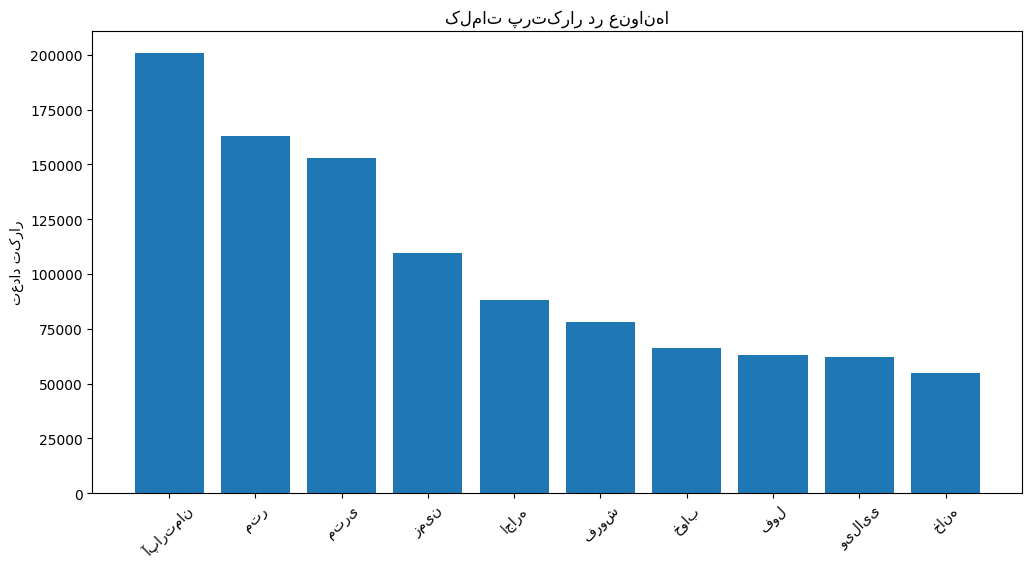

In [105]:
top_words = dict(title_words.most_common(10))

plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('کلمات پرتکرار در عنوان‌ها')
plt.xticks(rotation=45)
plt.ylabel('تعداد تکرار')
plt.show()

### 3. تحلیل طول متن‌ها:

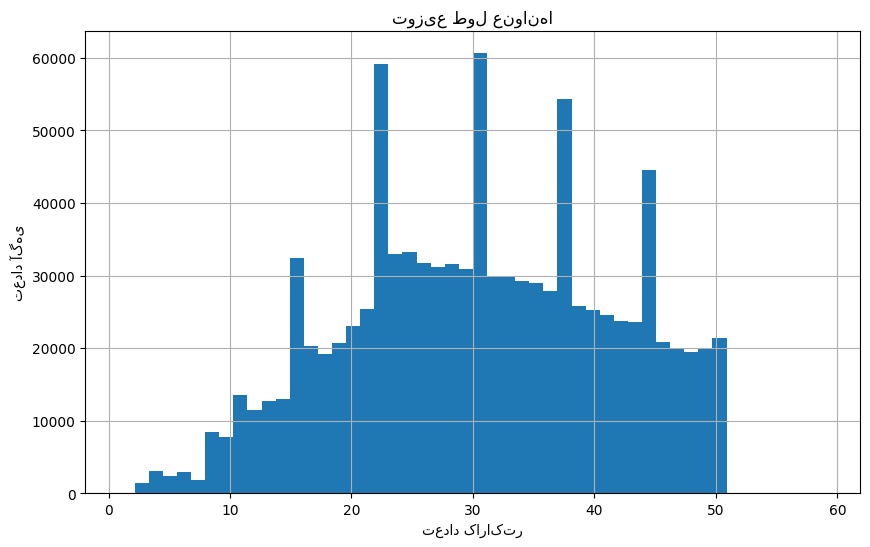

آمار طول عنوان‌ها:
count    1000000.000000
mean          30.552802
std           10.906618
min            1.000000
25%           23.000000
50%           30.000000
75%           39.000000
max           59.000000
Name: title_length, dtype: float64


In [ ]:
df['title_length'] = df['title'].str.len()

# نمودار توزیع طول عنوان‌ها
plt.figure(figsize=(10, 6))
df['title_length'].hist(bins=50)
plt.title('توزیع طول عنوان‌ها')
plt.xlabel('تعداد کاراکتر')
plt.ylabel('تعداد آگهی')
plt.show()

print("آمار طول عنوان‌ها:")
print(df['title_length'].describe())

### 4. تحلیل کلمات کلیدی بر اساس قیمت:

In [106]:
# کلمات پرتکرار در آگهی‌های گران
expensive_ads = df[df['price_value'] > df['price_value'].quantile(0.8)]
expensive_words = analyze_text('title')

print("کلمات پرتکرار در آگهی‌های گران:")
for word, count in expensive_words.most_common(10):
    print(f"{word}: {count} بار")

کلمات پرتکرار در آگهی‌های گران:
آپارتمان: 200738 بار
متر: 162987 بار
متری: 153073 بار
زمین: 109506 بار
اجاره: 88192 بار
فروش: 77978 بار
خواب: 66121 بار
فول: 63180 بار
ویلایی: 62092 بار
خانه: 54925 بار


بین کلمات پر تکرار و کلمات پر تکرار بر اثا قیمت وجود ندارد در نتیجه فرضو بر این میگیریم بر اثاث متراژ منطقه شرایط و مجهز بودن و بقیه موارد نیز فرقی نمیکنداما شهر به شهر هم در کد پایین چک میکنیم

### 5. تحلیل کلمات بر اساس شهر:

In [107]:
# کلمات پرتکرار در هر شهر
for city in df['city_slug'].value_counts().head(5).index:
    city_ads = df[df['city_slug'] == city]
    city_words = analyze_text('title')
    
    print(f"\nکلمات پرتکرار در {city}:")
    for word, count in city_words.most_common(5):
        print(f"  {word}: {count} بار")


کلمات پرتکرار در tehran:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در mashhad:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در karaj:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در shiraz:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در isfahan:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار


### 6. تحلیل کلمات بر اساس فصل:

In [110]:
# کلمات پرتکرار در هر فصل
df['season'] = df['created_at_month'].dt.quarter
for season in ['بهار', 'تابستان', 'پاییز', 'زمستان']:
    season_ads = df[df['season'] == season]
    season_words = analyze_text('title')
    
    print(f"\nکلمات پرتکرار در فصل {season}:")
    for word, count in season_words.most_common(5):
        print(f"  {word}: {count} بار")


کلمات پرتکرار در فصل بهار:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در فصل تابستان:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در فصل پاییز:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار

کلمات پرتکرار در فصل زمستان:
  آپارتمان: 200738 بار
  متر: 162987 بار
  متری: 153073 بار
  زمین: 109506 بار
  اجاره: 88192 بار


## تحلیل ها بر اثاث زمان 

### تعداد آگهی در هر ماه

In [28]:
monthly_counts = df['created_at_month'].dt.month.value_counts().sort_index()
print("\nتعداد آگهی در هر ماه:")
for month, count in monthly_counts.items():
    print(f"  {persian_months[month]}: {count} بار")


تعداد آگهی در هر ماه:
  فروردین: 2099 بار
  اردیبهشت: 1380 بار
  خرداد: 1912 بار
  تیر: 7215 بار
  مرداد: 108820 بار
  شهریور: 125695 بار
  مهر: 133319 بار
  آبان: 132522 بار
  آذر: 121615 بار
  دی: 126606 بار
  بهمن: 121819 بار
  اسفند: 116998 بار


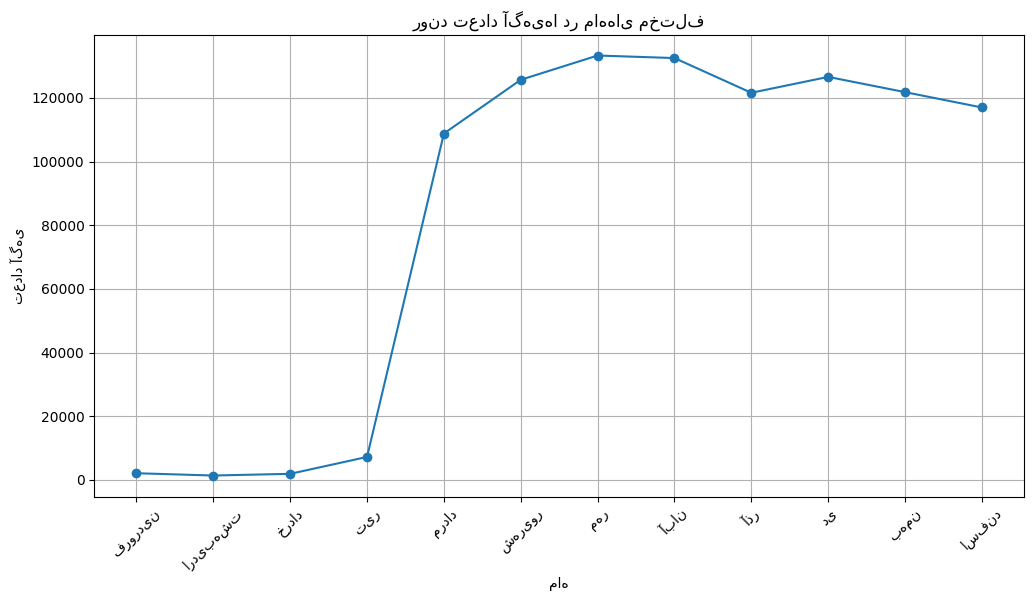

In [29]:
# تعداد آگهی در هر ماه با نمودار
monthly_counts = df['created_at_month'].dt.month.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('روند تعداد آگهی‌ها در ماه‌های مختلف')
plt.xlabel('ماه')
plt.ylabel('تعداد آگهی')
plt.xticks(range(1, 13), [persian_months[i] for i in range(1, 13)], rotation=45)
plt.grid(True)
plt.show()

### تحلیل روند زمانی بر قیمت بر اثاث ماه

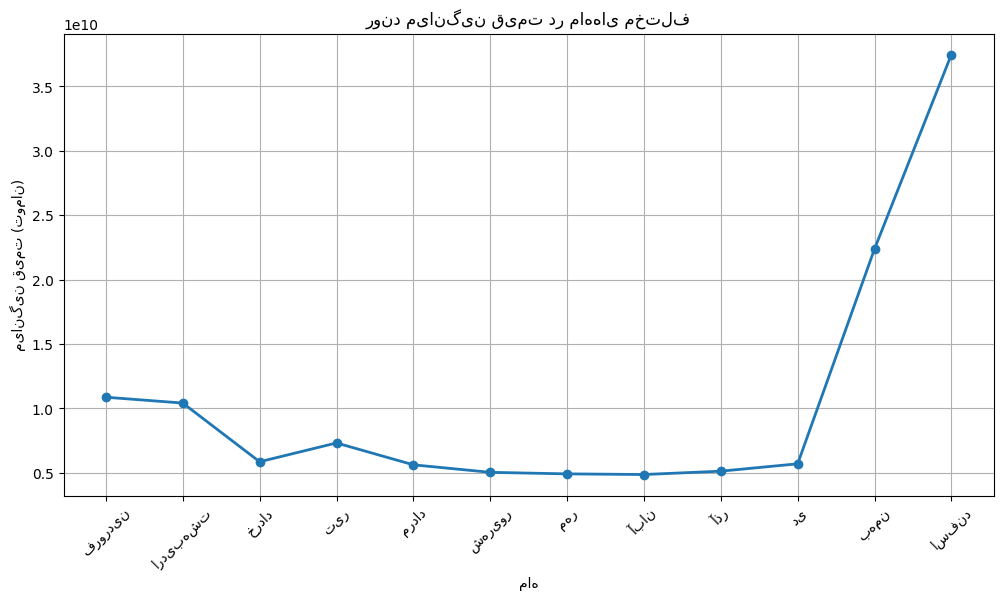

آمار قیمت در ماه‌های مختلف:
  فروردین: 10,861,432,486 تومان
  اردیبهشت: 10,408,217,891 تومان
  خرداد: 5,848,574,280 تومان
  تیر: 7,309,438,395 تومان
  مرداد: 5,610,725,699 تومان
  شهریور: 5,028,172,230 تومان
  مهر: 4,906,872,823 تومان
  آبان: 4,857,172,082 تومان
  آذر: 5,117,671,013 تومان
  دی: 5,689,046,870 تومان
  بهمن: 22,377,515,539 تومان
  اسفند: 37,481,481,165 تومان


In [ ]:
monthly_avg_price = df.groupby(df['created_at_month'].dt.month)['price_value'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linewidth=2)
plt.title('روند میانگین قیمت در ماه‌های مختلف')
plt.xlabel('ماه')
plt.ylabel('میانگین قیمت (تومان)')
plt.xticks(range(1, 13), [persian_months[i] for i in range(1, 13)], rotation=45)
plt.grid(True)
plt.show()

# نمایش آمار قیمت
print("آمار قیمت در ماه‌های مختلف:")
for month, avg_price in monthly_avg_price.items():
    print(f"  {persian_months[month]}: {avg_price:,.0f} تومان")

### تحلیل شهرهای پر مخاطب در هر فصل

شهرهای پر مخاطب در هر فصل:

بهار:
  tehran: 823 آگهی
  nur: 332 آگهی
  chamestan: 317 آگهی
  andisheh-new-town: 304 آگهی
  mashhad: 287 آگهی

تابستان:
  tehran: 46294 آگهی
  mashhad: 15762 آگهی
  karaj: 13628 آگهی
  isfahan: 8964 آگهی
  shiraz: 8610 آگهی

پاییز:
  tehran: 71283 آگهی
  mashhad: 27103 آگهی
  karaj: 18283 آگهی
  shiraz: 14929 آگهی
  isfahan: 14510 آگهی

زمستان:
  tehran: 72506 آگهی
  mashhad: 25880 آگهی
  karaj: 17186 آگهی
  shiraz: 13513 آگهی
  isfahan: 13333 آگهی


<Figure size 1500x1000 with 0 Axes>

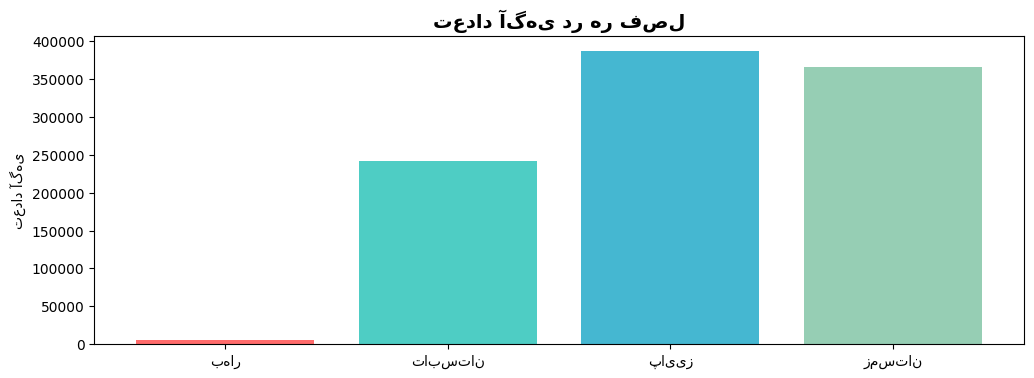

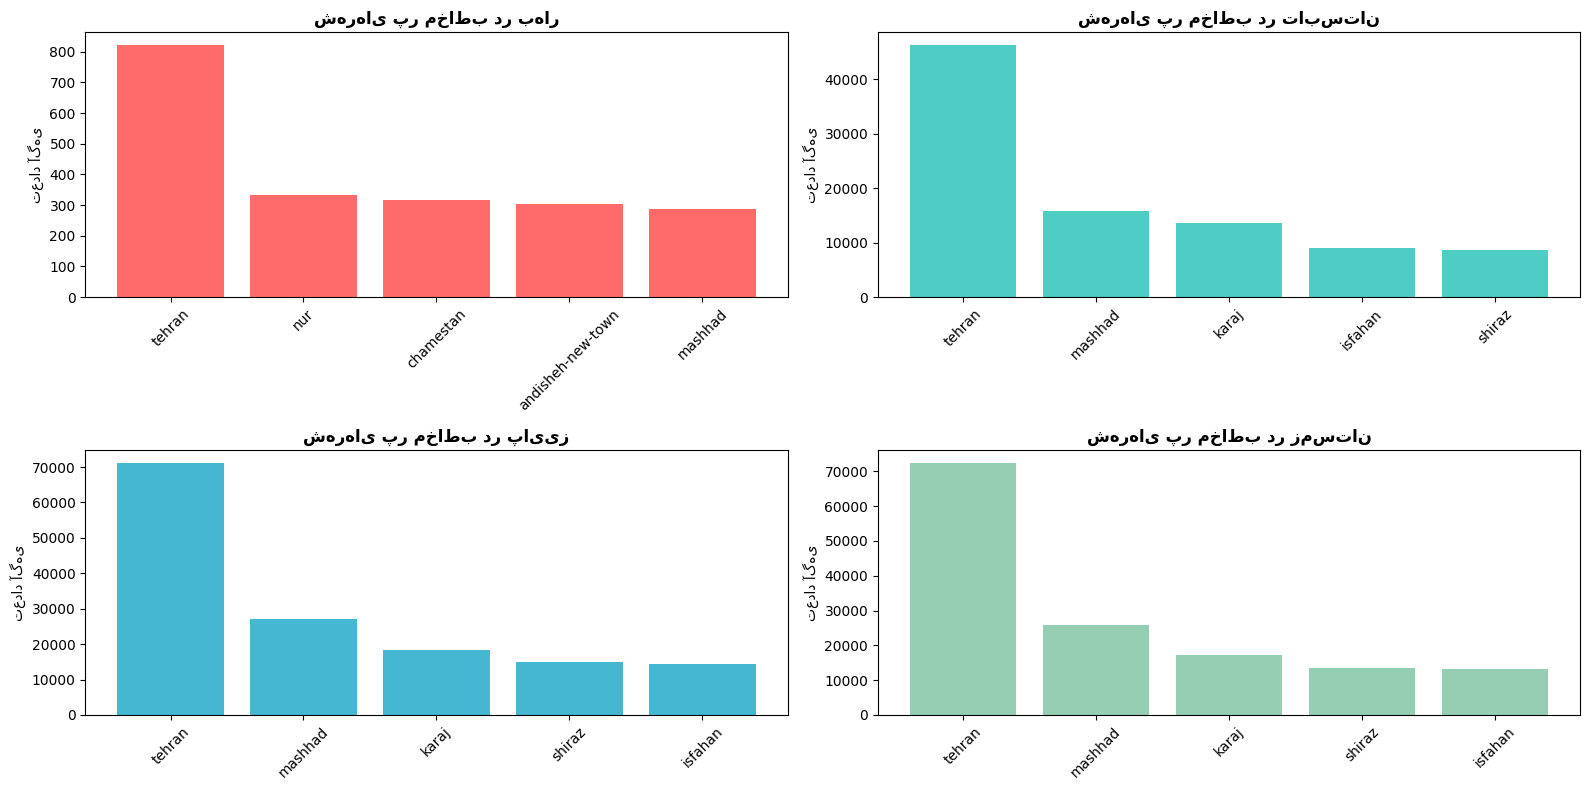

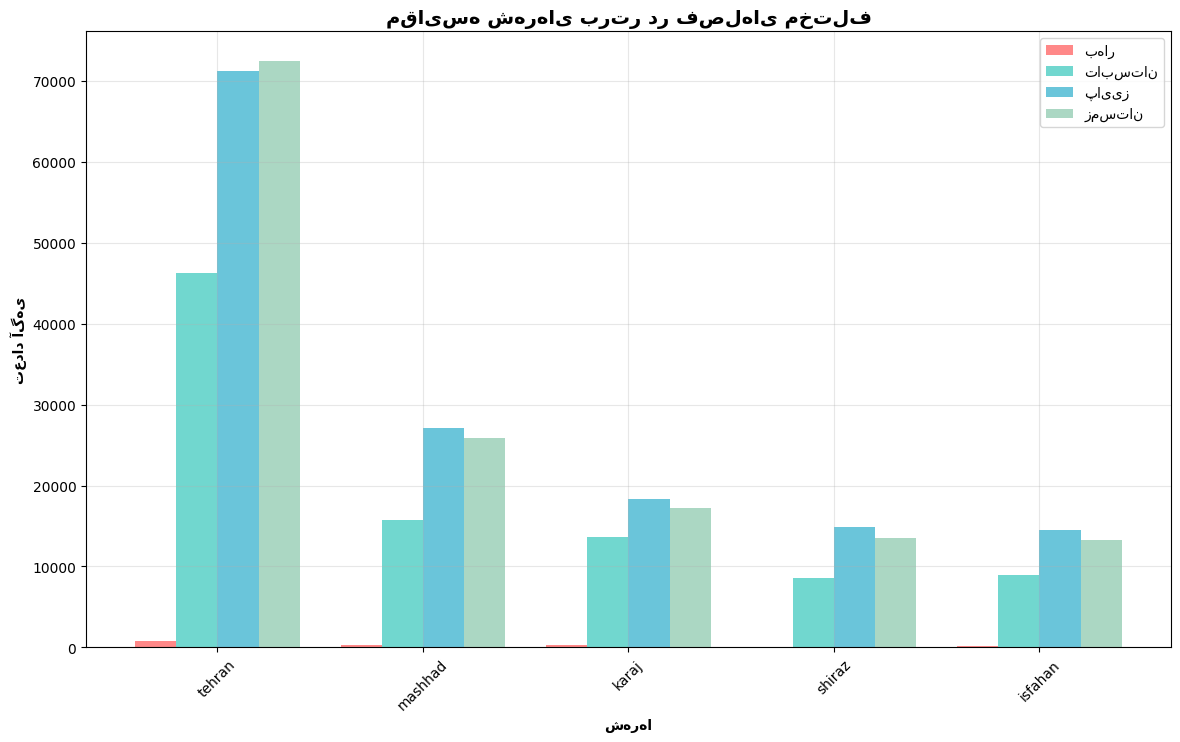


📊 آمار خلاصه فصل‌ها:
🌱 بهار:
   �� کل آگهی‌ها: 5,391
   🏆 شهر برتر: tehran (823 آگهی)
   📊 درصد شهر برتر: 15.3%

🌱 تابستان:
   �� کل آگهی‌ها: 241,730
   🏆 شهر برتر: tehran (46,294 آگهی)
   📊 درصد شهر برتر: 19.2%

🌱 پاییز:
   �� کل آگهی‌ها: 387,456
   🏆 شهر برتر: tehran (71,283 آگهی)
   📊 درصد شهر برتر: 18.4%

🌱 زمستان:
   �� کل آگهی‌ها: 365,423
   🏆 شهر برتر: tehran (72,506 آگهی)
   📊 درصد شهر برتر: 19.8%



In [ ]:

df['season'] = df['created_at_month'].dt.quarter
season_names = {1: 'بهار', 2: 'تابستان', 3: 'پاییز', 4: 'زمستان'}

# شهرهای برتر در هر فصل
top_cities_by_season = {}
for season in [1, 2, 3, 4]:
    season_data = df[df['season'] == season]
    top_cities = season_data['city_slug'].value_counts().head(5)
    top_cities_by_season[season_names[season]] = top_cities

# نمایش نتایج
print("شهرهای پر مخاطب در هر فصل:")
for season, cities in top_cities_by_season.items():
    print(f"\n{season}:")
    for city, count in cities.items():
        print(f"  {city}: {count} آگهی")

# نمودار مقایسه‌ای
plt.figure(figsize=(15, 10))

#نمودار 1: تعداد آگهی در هر فصل 
season_counts = df['season'].value_counts().sort_index()
season_labels = [season_names[i] for i in season_counts.index]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

plt.figure(figsize=(12, 4))
plt.bar(season_labels, season_counts.values, color=colors)
plt.title('تعداد آگهی در هر فصل', fontsize=14, fontweight='bold')
plt.ylabel('تعداد آگهی')
plt.show()

# نمودار 2: چهار فصل کنار هم 
plt.figure(figsize=(16, 8))

# بهار
plt.subplot(2, 2, 1)
spring_cities = df[df['season'] == 1]['city_slug'].value_counts().head(5)
plt.bar(spring_cities.index, spring_cities.values, color='#FF6B6B')
plt.title('شهرهای پر مخاطب در بهار', fontweight='bold')
plt.ylabel('تعداد آگهی')
plt.xticks(rotation=45)

# تابستان
plt.subplot(2, 2, 2)
summer_cities = df[df['season'] == 2]['city_slug'].value_counts().head(5)
plt.bar(summer_cities.index, summer_cities.values, color='#4ECDC4')
plt.title('شهرهای پر مخاطب در تابستان', fontweight='bold')
plt.ylabel('تعداد آگهی')
plt.xticks(rotation=45)

# پاییز
plt.subplot(2, 2, 3)
autumn_cities = df[df['season'] == 3]['city_slug'].value_counts().head(5)
plt.bar(autumn_cities.index, autumn_cities.values, color='#45B7D1')
plt.title('شهرهای پر مخاطب در پاییز', fontweight='bold')
plt.ylabel('تعداد آگهی')
plt.xticks(rotation=45)

# زمستان
plt.subplot(2, 2, 4)
winter_cities = df[df['season'] == 4]['city_slug'].value_counts().head(5)
plt.bar(winter_cities.index, winter_cities.values, color='#96CEB4')
plt.title('شهرهای پر مخاطب در زمستان', fontweight='bold')
plt.ylabel('تعداد آگهی')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# نمودار 3: مقایسه‌ای شهرهای برتر در همه فصل‌ها 
top_5_cities = df['city_slug'].value_counts().head(5).index

plt.figure(figsize=(14, 8))
x = np.arange(len(top_5_cities))
width = 0.2

for i, season in enumerate([1, 2, 3, 4]):
    season_data = df[df['season'] == season]
    city_counts = season_data['city_slug'].value_counts()
    counts = [city_counts.get(city, 0) for city in top_5_cities]
    
    plt.bar(x + i*width, counts, width, label=season_names[season], 
            alpha=0.8, color=colors[i])

plt.xlabel('شهرها', fontweight='bold')
plt.ylabel('تعداد آگهی', fontweight='bold')
plt.title('مقایسه شهرهای برتر در فصل‌های مختلف', fontsize=14, fontweight='bold')
plt.xticks(x + width*1.5, top_5_cities, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# آمار خلاصه
print("\n آمار خلاصه فصل‌ها:")
print("=" * 60)
for season in [1, 2, 3, 4]:
    season_data = df[df['season'] == season]
    total_ads = len(season_data)
    top_city = season_data['city_slug'].value_counts().index[0]
    top_city_count = season_data['city_slug'].value_counts().iloc[0]
    
    print(f" {season_names[season]}:")
    print(f"    کل آگهی‌ها: {total_ads:,}")
    print(f"    شهر برتر: {top_city} ({top_city_count:,} آگهی)")
    print(f"    درصد شهر برتر: {(top_city_count/total_ads)*100:.1f}%")
    print()

##  تحلیل مکانی 

### تحلیل توزیع جغرافیایی آگهی‌ها

 تحلیل توزیع جغرافیایی:
تعداد کل شهرها: 421

 10 شهر برتر:
 1. tehran: 190,906 آگهی (19.1%)
 2. mashhad: 69,032 آگهی (6.9%)
 3. karaj: 49,367 آگهی (4.9%)
 4. shiraz: 37,141 آگهی (3.7%)
 5. isfahan: 36,953 آگهی (3.7%)
 6. tabriz: 27,655 آگهی (2.8%)
 7. andisheh-new-town: 20,847 آگهی (2.1%)
 8. ahvaz: 19,590 آگهی (2.0%)
 9. qom: 17,109 آگهی (1.7%)
10. kermanshah: 17,048 آگهی (1.7%)


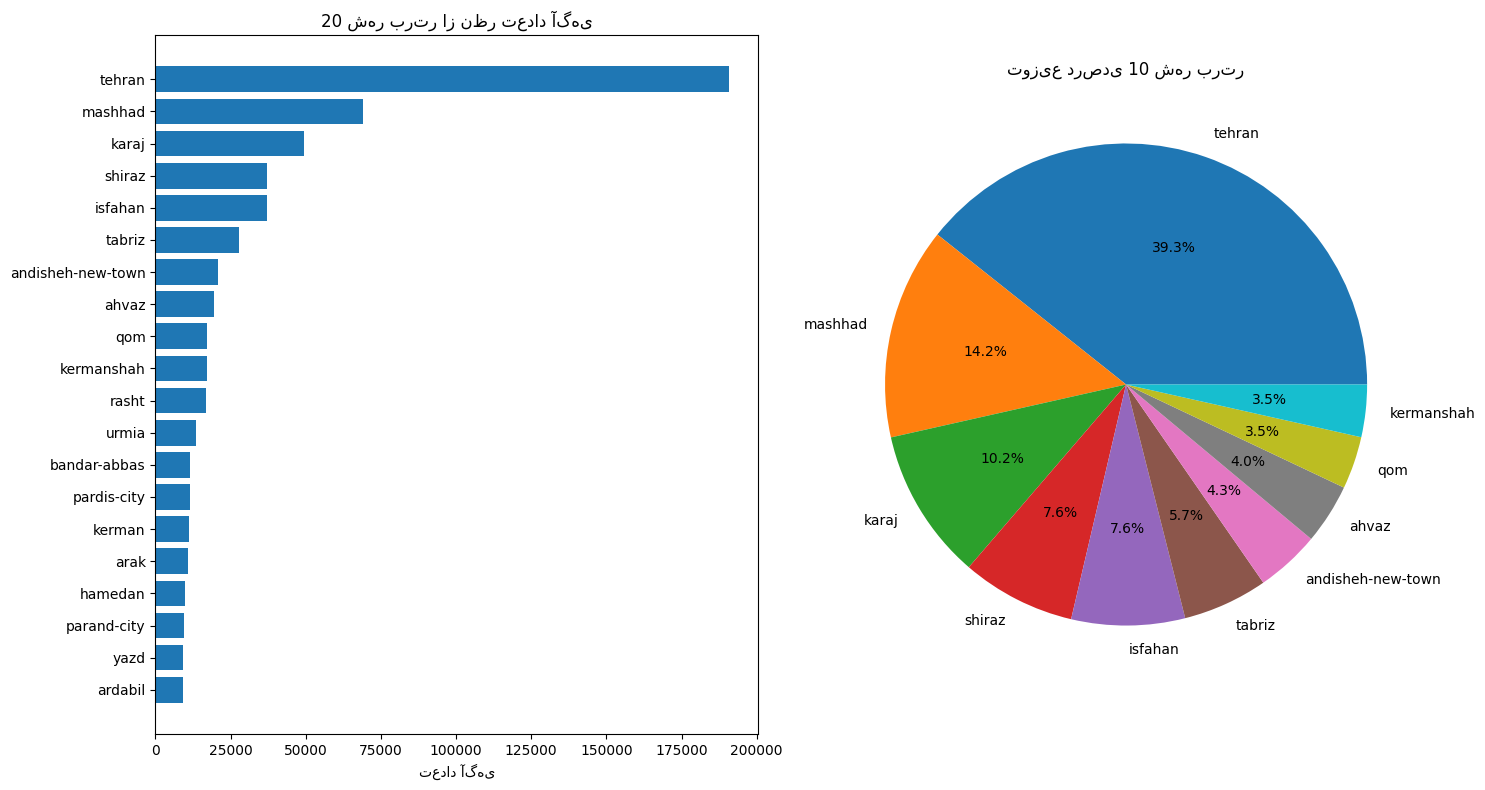

In [ ]:
print(" تحلیل توزیع جغرافیایی:")
print("=" * 50)

# تعداد آگهی در هر شهر
city_counts = df['city_slug'].value_counts()
print(f"تعداد کل شهرها: {len(city_counts)}")

# 10 شهر برتر
print("\n 10 شهر برتر:")
for i, (city, count) in enumerate(city_counts.head(10).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {city}: {count:,} آگهی ({percentage:.1f}%)")

# نمودار توزیع جغرافیایی
plt.figure(figsize=(15, 8))

# نمودار 1: 20 شهر برتر
plt.subplot(1, 2, 1)
top_20_cities = city_counts.head(20)
plt.barh(range(len(top_20_cities)), top_20_cities.values)
plt.yticks(range(len(top_20_cities)), top_20_cities.index)
plt.title('20 شهر برتر از نظر تعداد آگهی')
plt.xlabel('تعداد آگهی')
plt.gca().invert_yaxis()

# نمودار 2: توزیع درصدی
plt.subplot(1, 2, 2)
top_10_percentage = city_counts.head(10)
percentages = [(count / len(df)) * 100 for count in top_10_percentage.values]
plt.pie(percentages, labels=top_10_percentage.index, autopct='%1.1f%%')
plt.title('توزیع درصدی 10 شهر برتر')

plt.tight_layout()
plt.show()

### تحلیل قیمت بر اساس شهر

 تحلیل قیمت بر اساس شهر:
 10 شهر گران‌ترین:
 1. kojur:
    میانگین: 197,533,678,579 تومان
    میانه: 2,200,000,000 تومان
    تعداد آگهی: 57.0

 2. maraveh-tapeh:
    میانگین: 180,962,222,222 تومان
    میانه: 1,050,000,000 تومان
    تعداد آگهی: 5.0

 3. lamerd:
    میانگین: 176,085,738,851 تومان
    میانه: 1,800,000,000 تومان
    تعداد آگهی: 198.0

 4. chenaran:
    میانگین: 147,180,689,757 تومان
    میانه: 1,700,000,000 تومان
    تعداد آگهی: 698.0

 5. khomam:
    میانگین: 147,166,002,605 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 701.0

 6. piranshahr:
    میانگین: 142,872,269,427 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 79.0

 7. maku:
    میانگین: 139,531,769,864 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 594.0

 8. tahergurab:
    میانگین: 132,235,509,690 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 86.0

 9. mahabad:
    میانگین: 105,422,583,200 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 434.0

10. jahrom:
    میانگین: 88,956,874,1

C:\Users\asus\AppData\Local\Temp\ipykernel_4420\917867892.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_city = df.groupby('city_slug')['price_value'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)


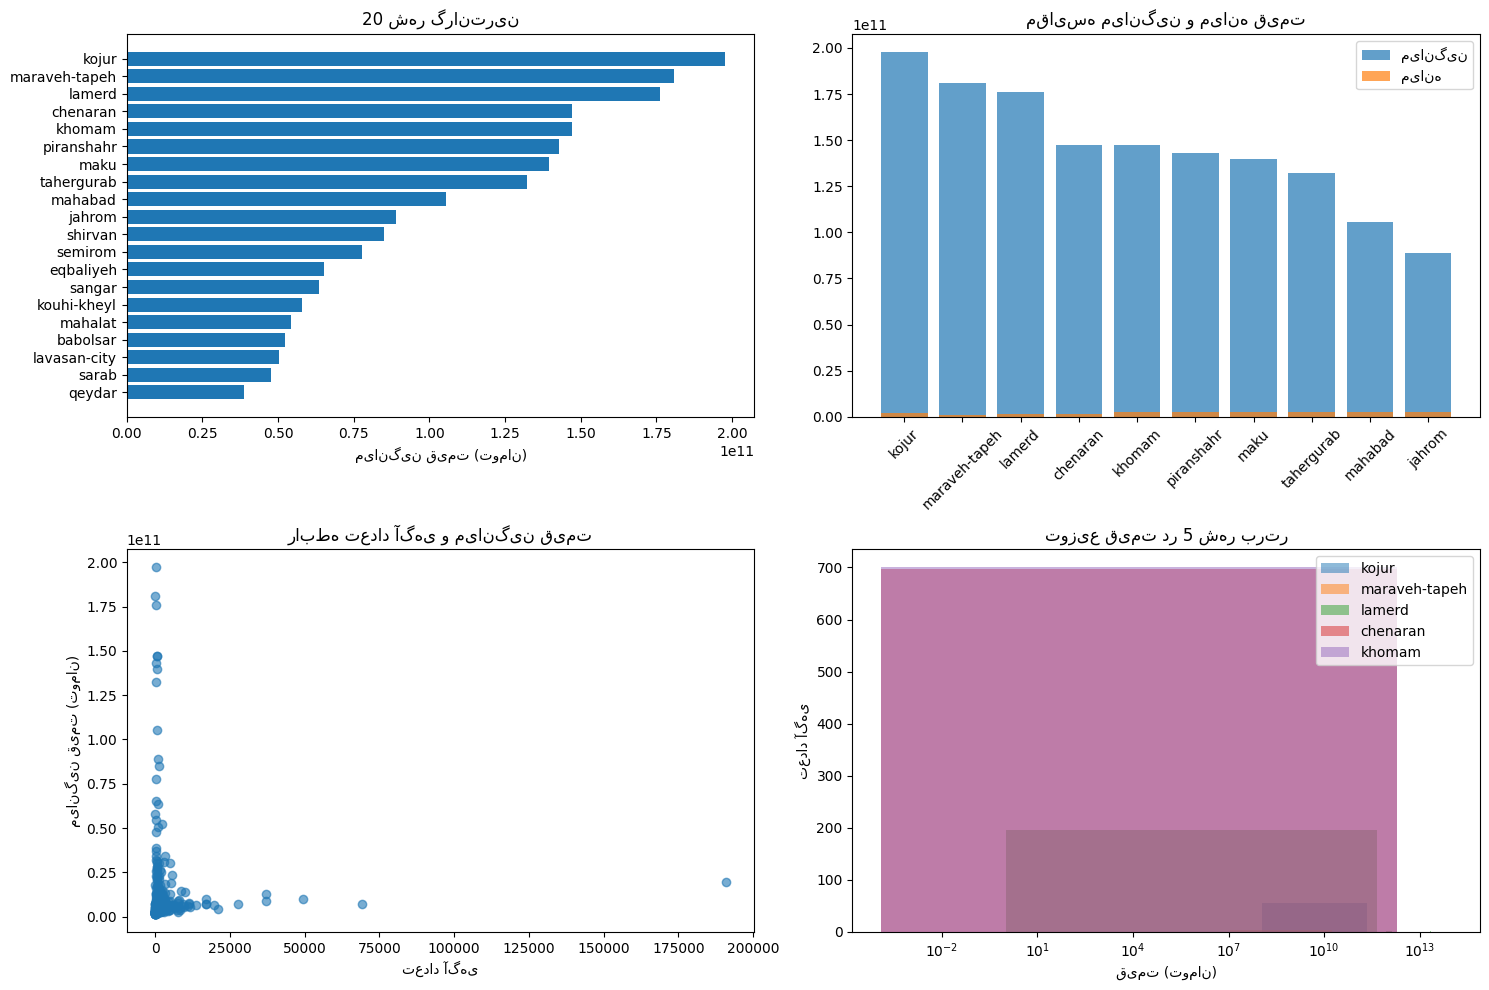

In [39]:
print(" تحلیل قیمت بر اساس شهر:")
print("=" * 50)

# میانگین قیمت در هر شهر
avg_price_by_city = df.groupby('city_slug')['price_value'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

print(" 10 شهر گران‌ترین:")
for i, (city, stats) in enumerate(avg_price_by_city.head(10).iterrows(), 1):
    print(f"{i:2d}. {city}:")
    print(f"    میانگین: {stats['mean']:,.0f} تومان")
    print(f"    میانه: {stats['median']:,.0f} تومان")
    print(f"    تعداد آگهی: {stats['count']:,}")
    print()

# نمودار قیمت بر اساس شهر
plt.figure(figsize=(15, 10))

# نمودار 1: میانگین قیمت 20 شهر برتر
plt.subplot(2, 2, 1)
top_20_expensive = avg_price_by_city.head(20)
plt.barh(range(len(top_20_expensive)), top_20_expensive['mean'])
plt.yticks(range(len(top_20_expensive)), top_20_expensive.index)
plt.title('20 شهر گران‌ترین')
plt.xlabel('میانگین قیمت (تومان)')
plt.gca().invert_yaxis()

# نمودار 2: مقایسه میانگین و میانه
plt.subplot(2, 2, 2)
top_10_cities = avg_price_by_city.head(10)
x = range(len(top_10_cities))
plt.bar(x, top_10_cities['mean'], label='میانگین', alpha=0.7)
plt.bar(x, top_10_cities['median'], label='میانه', alpha=0.7)
plt.xticks(x, top_10_cities.index, rotation=45)
plt.title('مقایسه میانگین و میانه قیمت')
plt.legend()

# نمودار 3: تعداد آگهی vs میانگین قیمت
plt.subplot(2, 2, 3)
plt.scatter(avg_price_by_city['count'], avg_price_by_city['mean'], alpha=0.6)
plt.xlabel('تعداد آگهی')
plt.ylabel('میانگین قیمت (تومان)')
plt.title('رابطه تعداد آگهی و میانگین قیمت')

# نمودار 4: توزیع قیمت در شهرهای برتر
plt.subplot(2, 2, 4)
top_5_cities = avg_price_by_city.head(5).index
for city in top_5_cities:
    city_data = df[df['city_slug'] == city]['price_value']
    plt.hist(city_data, alpha=0.5, label=city, bins=50)
plt.xlabel('قیمت (تومان)')
plt.ylabel('تعداد آگهی')
plt.title('توزیع قیمت در 5 شهر برتر')
plt.legend()
plt.xscale('log')

plt.tight_layout()
plt.show()

### امکانات بر اساس منطقه

 تحلیل امکانات بر اساس منطقه:
 درصد امکانات در 10 شهر برتر:

 tehran:
   has_balcony: 47.4%
   has_elevator: 61.6%
   has_warehouse: 74.1%
   has_parking: 67.7%
   has_warm_water_provider: 48.0%
   has_heating_system: 48.9%
   has_cooling_system: 49.5%
   has_restroom: 52.3%
   has_security_guard: 0.0%
   has_barbecue: 0.0%
   has_pool: 0.0%
   has_jacuzzi: 0.0%
   has_sauna: 0.0%

 mashhad:
   has_balcony: 41.8%
   has_elevator: 38.1%
   has_warehouse: 63.2%
   has_parking: 56.9%
   has_warm_water_provider: 44.9%
   has_heating_system: 44.2%
   has_cooling_system: 43.3%
   has_restroom: 47.4%
   has_security_guard: 0.0%
   has_barbecue: 0.0%
   has_pool: 0.0%
   has_jacuzzi: 0.0%
   has_sauna: 0.0%

 karaj:
   has_balcony: 52.7%
   has_elevator: 48.3%
   has_warehouse: 74.2%
   has_parking: 63.2%
   has_warm_water_provider: 50.3%
   has_heating_system: 49.6%
   has_cooling_system: 50.9%
   has_restroom: 52.9%
   has_security_guard: 0.0%
   has_barbecue: 0.0%
   has_pool: 0.0%
   has_j

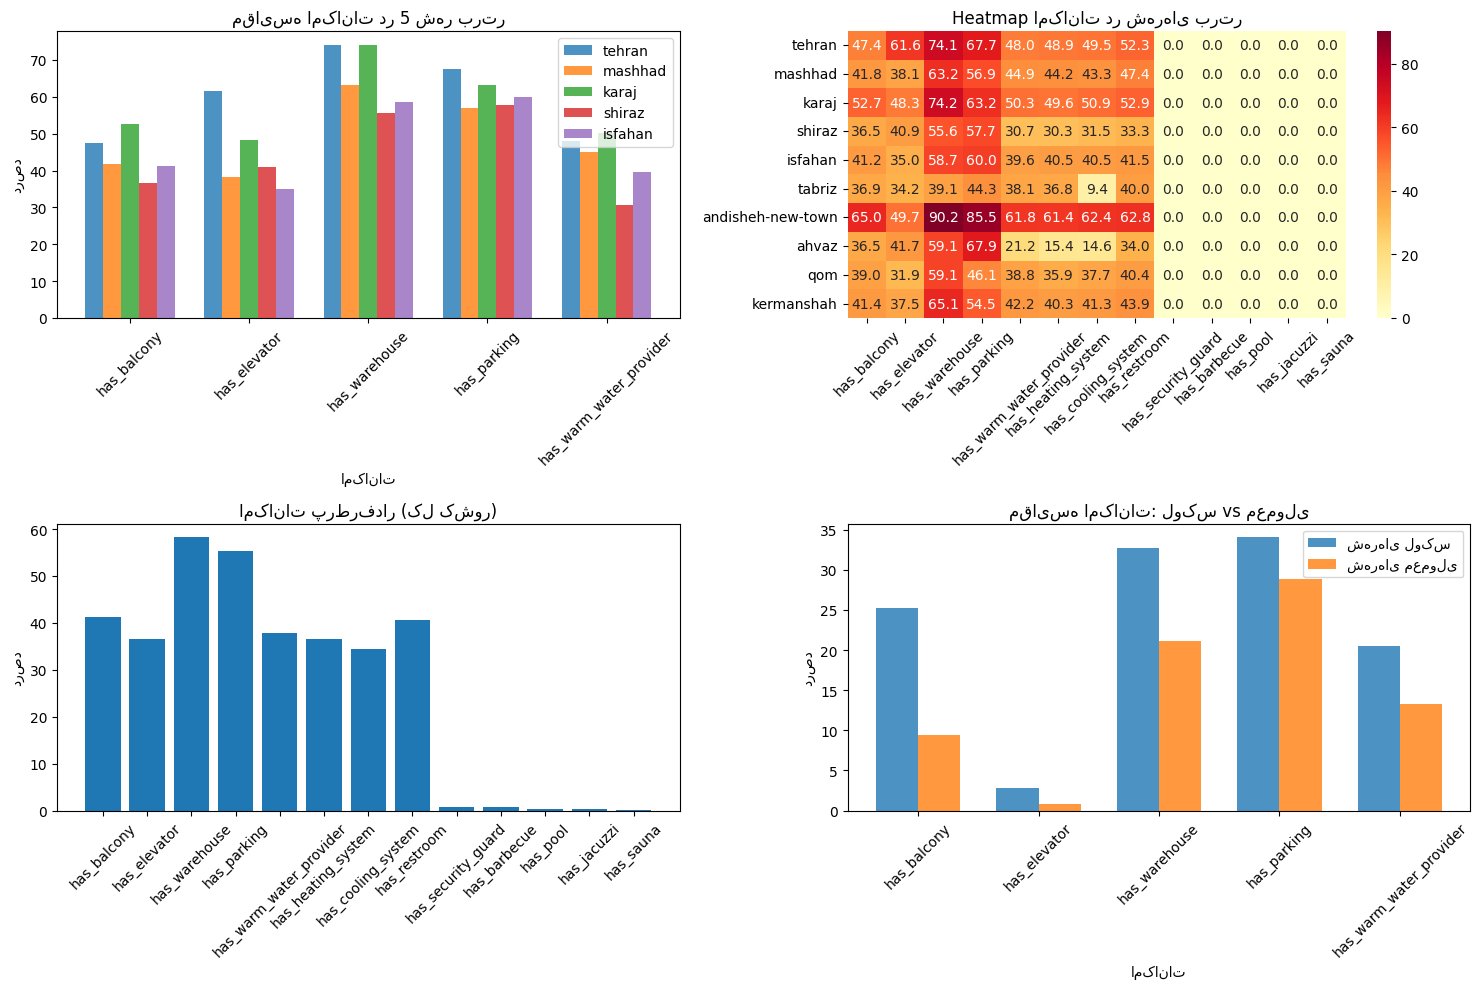

In [ ]:
print(" تحلیل امکانات بر اساس منطقه:")
print("=" * 50)

# امکانات موجود
amenities = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
             'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
             'has_restroom', 'has_security_guard', 'has_barbecue', 'has_pool',
             'has_jacuzzi', 'has_sauna']

# تحلیل امکانات در شهرهای برتر
top_10_cities = city_counts.head(10).index

print(" درصد امکانات در 10 شهر برتر:")
for city in top_10_cities:
    city_data = df[df['city_slug'] == city]
    print(f"\n {city}:")
    for amenity in amenities:
        percentage = (city_data[amenity].sum() / len(city_data)) * 100
        print(f"   {amenity}: {percentage:.1f}%")

# نمودار امکانات بر اساس منطقه
plt.figure(figsize=(15, 10))

# نمودار 1: مقایسه امکانات در شهرهای برتر
plt.subplot(2, 2, 1)
top_5_cities = city_counts.head(5).index
amenity_data = []
for city in top_5_cities:
    city_data = df[df['city_slug'] == city]
    city_amenities = []
    for amenity in amenities[:5]:  # فقط 5 امکانات اول
        percentage = (city_data[amenity].sum() / len(city_data)) * 100
        city_amenities.append(percentage)
    amenity_data.append(city_amenities)

amenity_data = np.array(amenity_data)
x = np.arange(len(amenities[:5]))
width = 0.15

for i, city in enumerate(top_5_cities):
    plt.bar(x + i*width, amenity_data[i], width, label=city, alpha=0.8)

plt.xlabel('امکانات')
plt.ylabel('درصد')
plt.title('مقایسه امکانات در 5 شهر برتر')
plt.xticks(x + width*2, amenities[:5], rotation=45)
plt.legend()

# نمودار 2: Heatmap امکانات
plt.subplot(2, 2, 2)
amenity_matrix = []
for city in top_10_cities:
    city_data = df[df['city_slug'] == city]
    city_amenities = []
    for amenity in amenities:
        percentage = (city_data[amenity].sum() / len(city_data)) * 100
        city_amenities.append(percentage)
    amenity_matrix.append(city_amenities)

sns.heatmap(amenity_matrix, 
            xticklabels=amenities, 
            yticklabels=top_10_cities,
            annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap امکانات در شهرهای برتر')
plt.xticks(rotation=45)

# نمودار 3: امکانات پرطرفدار
plt.subplot(2, 2, 3)
overall_amenities = []
for amenity in amenities:
    percentage = (df[amenity].sum() / len(df)) * 100
    overall_amenities.append(percentage)

plt.bar(amenities, overall_amenities)
plt.title('امکانات پرطرفدار (کل کشور)')
plt.ylabel('درصد')
plt.xticks(rotation=45)

# نمودار 4: مقایسه شهرهای لوکس vs معمولی
plt.subplot(2, 2, 4)
luxury_cities = avg_price_by_city.head(5).index
normal_cities = avg_price_by_city.tail(5).index

luxury_amenities = []
normal_amenities = []

for amenity in amenities[:5]:
    # شهرهای لوکس
    luxury_data = df[df['city_slug'].isin(luxury_cities)]
    luxury_percentage = (luxury_data[amenity].sum() / len(luxury_data)) * 100
    luxury_amenities.append(luxury_percentage)
    
    # شهرهای معمولی
    normal_data = df[df['city_slug'].isin(normal_cities)]
    normal_percentage = (normal_data[amenity].sum() / len(normal_data)) * 100
    normal_amenities.append(normal_percentage)

x = np.arange(len(amenities[:5]))
width = 0.35

plt.bar(x - width/2, luxury_amenities, width, label='شهرهای لوکس', alpha=0.8)
plt.bar(x + width/2, normal_amenities, width, label='شهرهای معمولی', alpha=0.8)

plt.xlabel('امکانات')
plt.ylabel('درصد')
plt.title('مقایسه امکانات: لوکس vs معمولی')
plt.xticks(x, amenities[:5], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## تحلیل اقتصادی

### تحلیل توزیع قیمت

 تحلیل توزیع قیمت:
 آمار توصیفی قیمت:
  میانگین: 11,095,436,302 تومان
  میانه: 2,840,000,000 تومان
  انحراف معیار: 443,248,856,096 تومان
  حداقل: 0 تومان
  حداکثر: 99,999,999,999,999 تومان


C:\Users\asus\AppData\Local\Temp\ipykernel_4420\211861254.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(city_price_data, labels=top_10_cities)


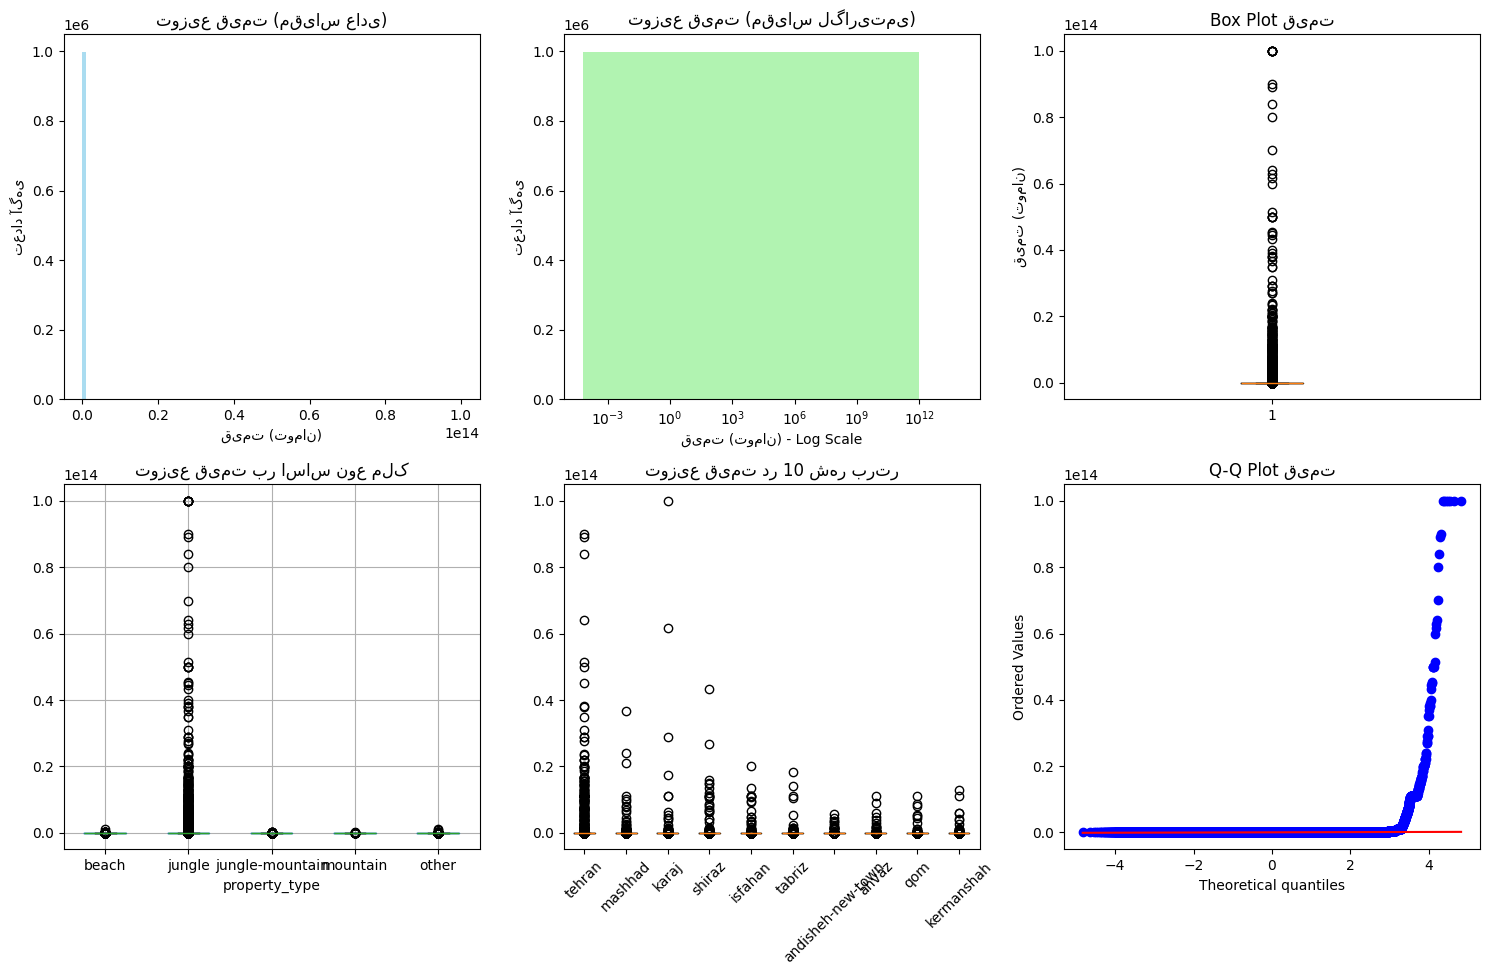


�� تحلیل Outliers:
  تعداد Outliers: 302,408 (30.2%)
  حد پایین: 1,225,000,000 تومان
  حد بالا: 4,545,000,000 تومان


In [ ]:
print(" تحلیل توزیع قیمت:")
print("=" * 50)

# آمار توصیفی قیمت
price_stats = df['price_value'].describe()
print(" آمار توصیفی قیمت:")
print(f"  میانگین: {price_stats['mean']:,.0f} تومان")
print(f"  میانه: {price_stats['50%']:,.0f} تومان")
print(f"  انحراف معیار: {price_stats['std']:,.0f} تومان")
print(f"  حداقل: {price_stats['min']:,.0f} تومان")
print(f"  حداکثر: {price_stats['max']:,.0f} تومان")

# نمودار توزیع قیمت
plt.figure(figsize=(15, 10))

# نمودار 1: هیستوگرام قیمت (مقیاس عادی)
plt.subplot(2, 3, 1)
plt.hist(df['price_value'], bins=100, alpha=0.7, color='skyblue')
plt.title('توزیع قیمت (مقیاس عادی)')
plt.xlabel('قیمت (تومان)')
plt.ylabel('تعداد آگهی')

# نمودار 2: هیستوگرام قیمت (مقیاس لگاریتمی)
plt.subplot(2, 3, 2)
plt.hist(df['price_value'], bins=100, alpha=0.7, color='lightgreen')
plt.xscale('log')
plt.title('توزیع قیمت (مقیاس لگاریتمی)')
plt.xlabel('قیمت (تومان) - Log Scale')
plt.ylabel('تعداد آگهی')

# نمودار 3: Box Plot قیمت
plt.subplot(2, 3, 3)
plt.boxplot(df['price_value'])
plt.title('Box Plot قیمت')
plt.ylabel('قیمت (تومان)')

# نمودار 4: توزیع قیمت بر اساس نوع ملک
plt.subplot(2, 3, 4)
df.boxplot(column='price_value', by='property_type', ax=plt.gca())
plt.title('توزیع قیمت بر اساس نوع ملک')
plt.suptitle('')

# نمودار 5: توزیع قیمت بر اساس شهر (10 شهر برتر)
plt.subplot(2, 3, 5)
top_10_cities = df['city_slug'].value_counts().head(10).index
city_price_data = [df[df['city_slug'] == city]['price_value'] for city in top_10_cities]
plt.boxplot(city_price_data, labels=top_10_cities)
plt.title('توزیع قیمت در 10 شهر برتر')
plt.xticks(rotation=45)

# نمودار 6: Q-Q Plot برای بررسی نرمال بودن
plt.subplot(2, 3, 6)
from scipy import stats
stats.probplot(df['price_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot قیمت')

plt.tight_layout()
plt.show()

# تحلیل قیمت‌های غیرعادی (Outliers)
Q1 = df['price_value'].quantile(0.25)
Q3 = df['price_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price_value'] < lower_bound) | (df['price_value'] > upper_bound)]
print(f"\n تحلیل Outliers:")
print(f"  تعداد Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.1f}%)")
print(f"  حد پایین: {lower_bound:,.0f} تومان")
print(f"  حد بالا: {upper_bound:,.0f} تومان")

### تحلیل همبستگی متغیرها


 تحلیل همبستگی متغیرها:


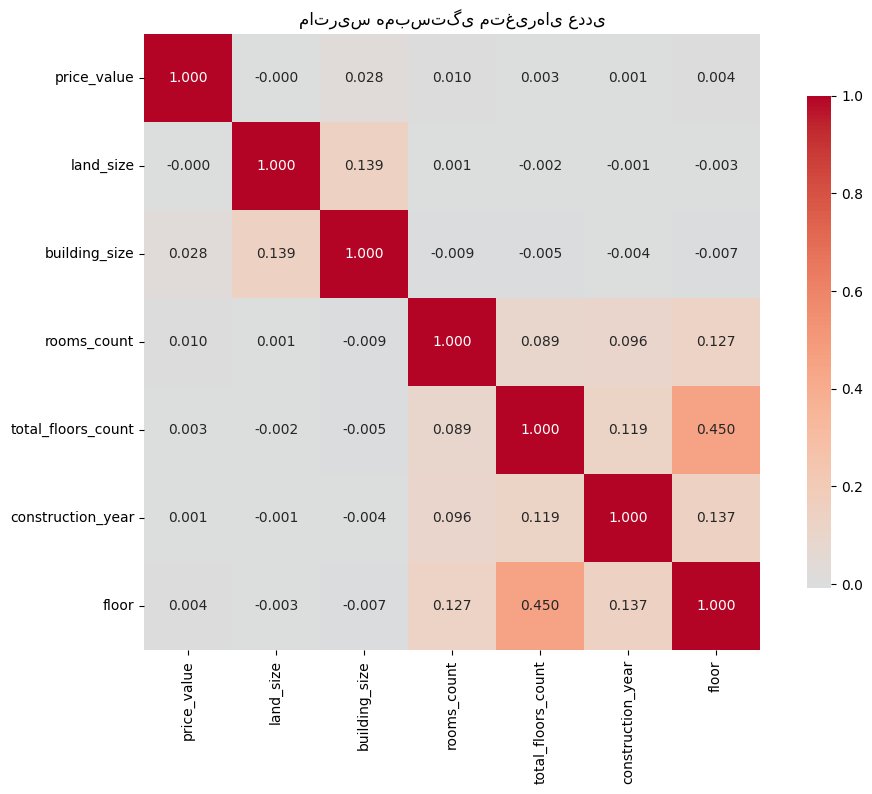


🔗 همبستگی با قیمت:
  building_size: 0.028
  rooms_count: 0.010
  floor: 0.004
  total_floors_count: 0.003
  construction_year: 0.001
  land_size: -0.000


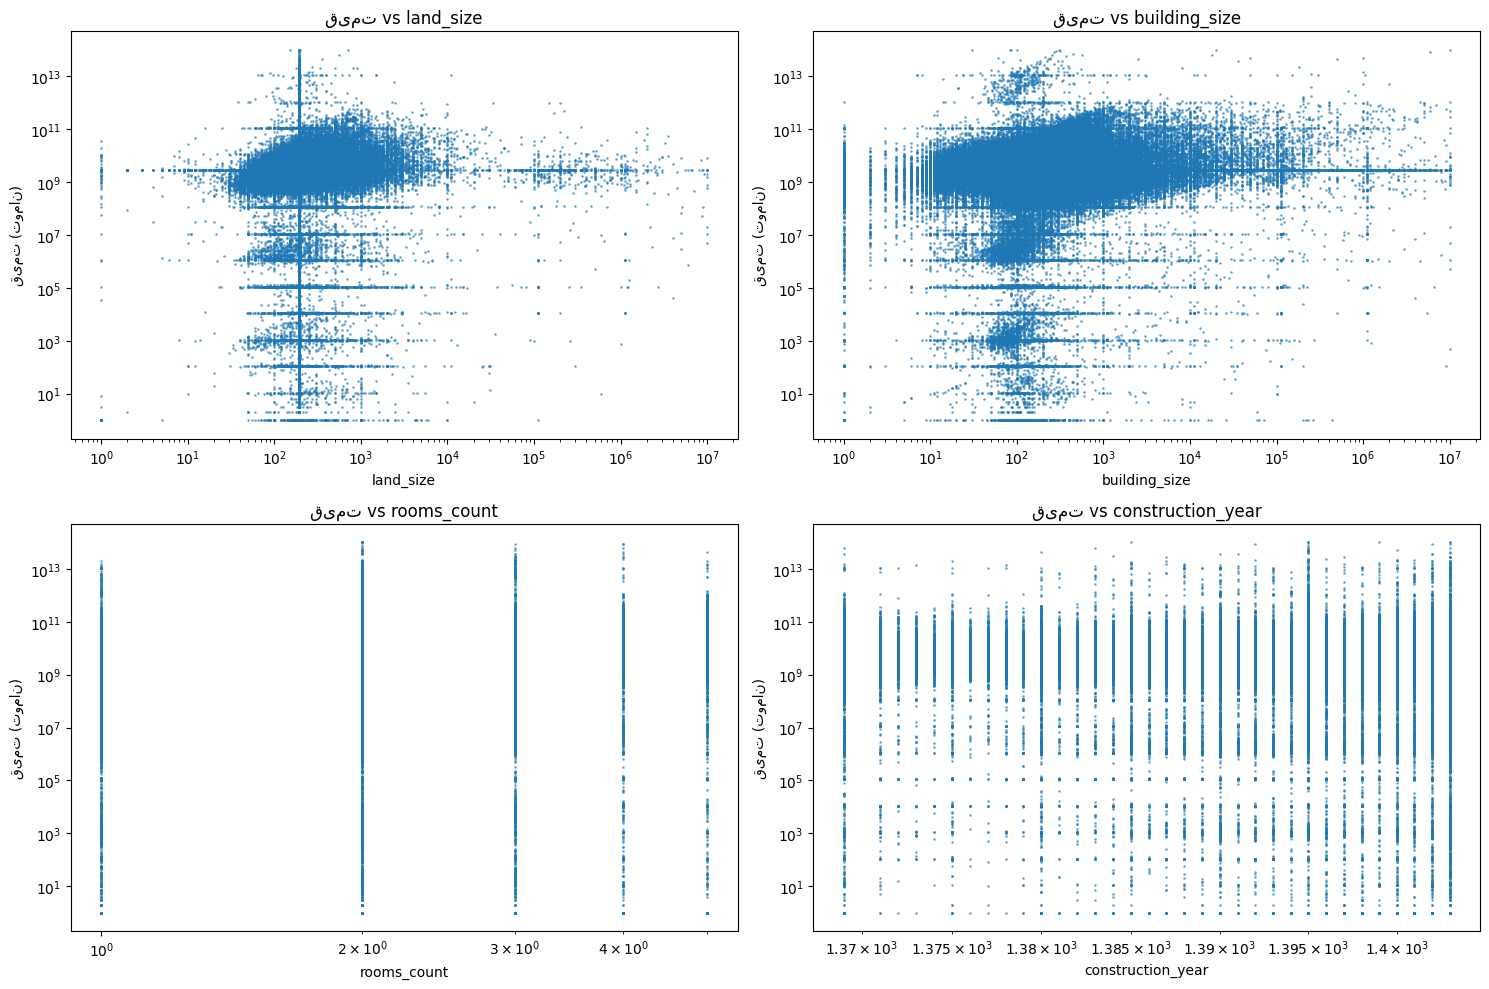

In [ ]:
print("\n تحلیل همبستگی متغیرها:")
print("=" * 50)

# انتخاب متغیرهای عددی
numeric_columns = ['price_value', 'land_size', 'building_size', 'rooms_count', 
                  'total_floors_count', 'construction_year', 'floor']

# ماتریس همبستگی
correlation_matrix = df[numeric_columns].corr()

# نمودار Heatmap همبستگی
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('ماتریس همبستگی متغیرهای عددی')
plt.show()

# تحلیل همبستگی با قیمت
price_correlations = correlation_matrix['price_value'].sort_values(ascending=False)
print("\n همبستگی با قیمت:")
for variable, corr in price_correlations.items():
    if variable != 'price_value':
        print(f"  {variable}: {corr:.3f}")

# نمودار Scatter Plot متغیرهای مهم
important_vars = ['land_size', 'building_size', 'rooms_count', 'construction_year']
plt.figure(figsize=(15, 10))

for i, var in enumerate(important_vars, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[var], df['price_value'], alpha=0.5, s=1)
    plt.xlabel(var)
    plt.ylabel('قیمت (تومان)')
    plt.title(f'قیمت vs {var}')
    plt.xscale('log')
    plt.yscale('log')

plt.tight_layout()
plt.show()

### تحلیل قیمت بر اساس ویژگی‌های مختلف


 تحلیل قیمت بر اساس ویژگی‌ها:
 تأثیر امکانات بر قیمت:

  has_balcony:
    با امکانات: 12,195,049,185 تومان
    بدون امکانات: 10,322,449,710 تومان
    تفاوت: 1,872,599,475 تومان (+18.1%)

  has_elevator:
    با امکانات: 12,771,455,157 تومان
    بدون امکانات: 10,131,440,075 تومان
    تفاوت: 2,640,015,082 تومان (+26.1%)

  has_warehouse:
    با امکانات: 11,591,898,485 تومان
    بدون امکانات: 10,403,299,887 تومان
    تفاوت: 1,188,598,598 تومان (+11.4%)

  has_parking:
    با امکانات: 11,782,935,063 تومان
    بدون امکانات: 10,246,480,779 تومان
    تفاوت: 1,536,454,284 تومان (+15.0%)

  has_warm_water_provider:
    با امکانات: 10,897,815,999 تومان
    بدون امکانات: 11,215,593,814 تومان
    تفاوت: -317,777,815 تومان (-2.8%)

  has_heating_system:
    با امکانات: 10,808,856,365 تومان
    بدون امکانات: 11,260,768,986 تومان
    تفاوت: -451,912,621 تومان (-4.0%)

  has_cooling_system:
    با امکانات: 10,784,016,271 تومان
    بدون امکانات: 11,259,250,486 تومان
    تفاوت: -475,234,215 تومان (-4.2%

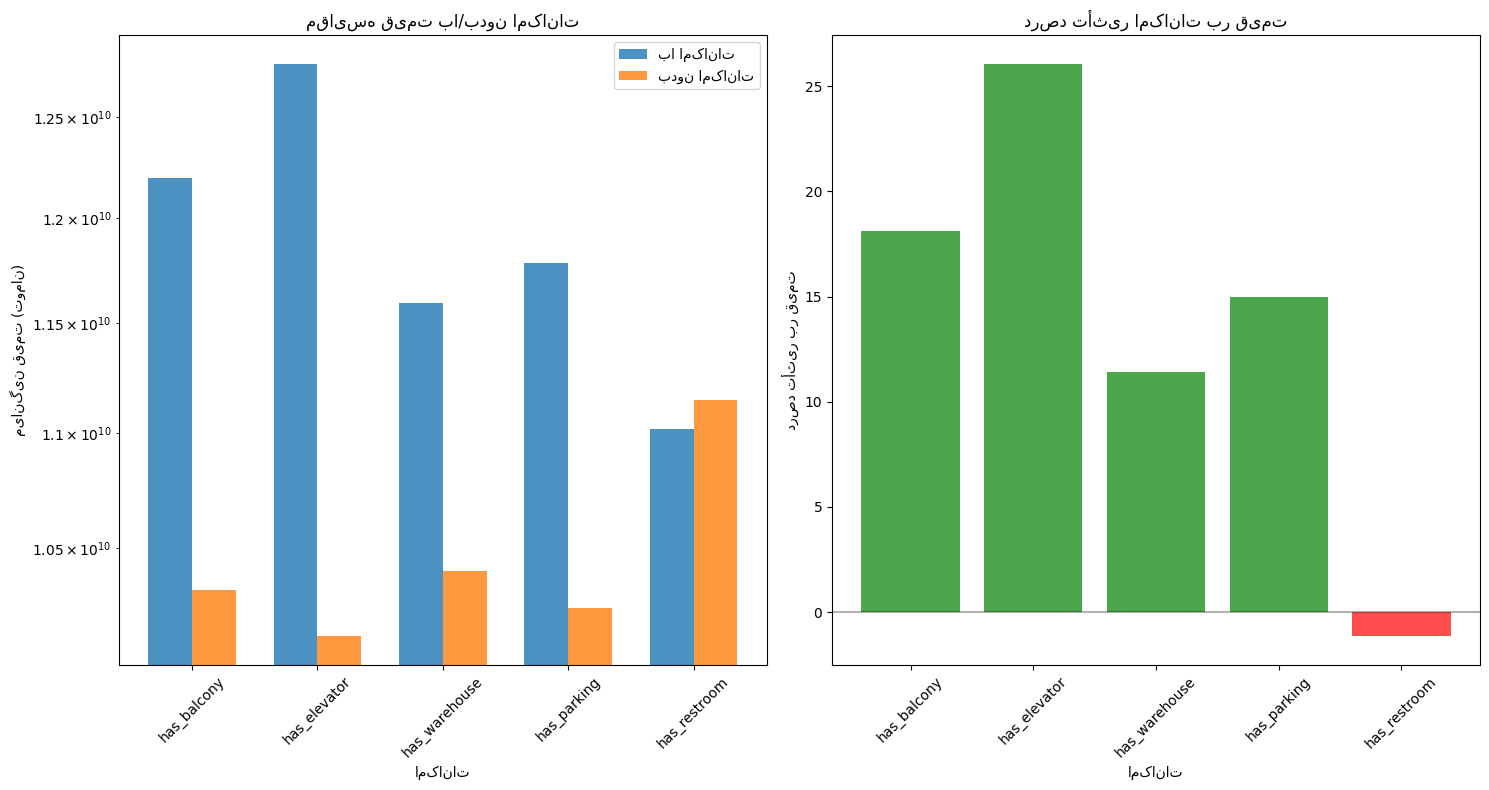

In [ ]:
print("\n تحلیل قیمت بر اساس ویژگی‌ها:")
print("=" * 50)

# قیمت بر اساس امکانات
amenities = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
             'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
             'has_restroom', 'has_security_guard', 'has_barbecue', 'has_pool',
             'has_jacuzzi', 'has_sauna']

amenity_price_analysis = {}
for amenity in amenities:
    with_amenity = df[df[amenity] == 1]['price_value'].mean()
    without_amenity = df[df[amenity] == 0]['price_value'].mean()
    difference = with_amenity - without_amenity
    percentage_diff = (difference / without_amenity) * 100
    
    amenity_price_analysis[amenity] = {
        'with_amenity': with_amenity,
        'without_amenity': without_amenity,
        'difference': difference,
        'percentage_diff': percentage_diff
    }

print(" تأثیر امکانات بر قیمت:")
for amenity, stats in amenity_price_analysis.items():
    print(f"\n  {amenity}:")
    print(f"    با امکانات: {stats['with_amenity']:,.0f} تومان")
    print(f"    بدون امکانات: {stats['without_amenity']:,.0f} تومان")
    print(f"    تفاوت: {stats['difference']:,.0f} تومان ({stats['percentage_diff']:+.1f}%)")

# نمودار تأثیر امکانات بر قیمت
plt.figure(figsize=(15, 8))

# نمودار 1: مقایسه قیمت با/بدون امکانات
plt.subplot(1, 2, 1)
### اینجا میتونیم هرچی که بخایمم اضافه کنیم  الان فقط پنج تاس ولی بیشترم مشه
amenities_short = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 'has_restroom']
with_prices = [amenity_price_analysis[amenity]['with_amenity'] for amenity in amenities_short]
without_prices = [amenity_price_analysis[amenity]['without_amenity'] for amenity in amenities_short]

x = np.arange(len(amenities_short))
width = 0.35

plt.bar(x - width/2, with_prices, width, label='با امکانات', alpha=0.8)
plt.bar(x + width/2, without_prices, width, label='بدون امکانات', alpha=0.8)
plt.xlabel('امکانات')
plt.ylabel('میانگین قیمت (تومان)')
plt.title('مقایسه قیمت با/بدون امکانات')
plt.xticks(x, amenities_short, rotation=45)
plt.legend()
plt.yscale('log')

# نمودار 2: درصد تأثیر امکانات
plt.subplot(1, 2, 2)
percentage_effects = [amenity_price_analysis[amenity]['percentage_diff'] for amenity in amenities_short]
colors = ['green' if p > 0 else 'red' for p in percentage_effects]

plt.bar(amenities_short, percentage_effects, color=colors, alpha=0.7)
plt.xlabel('امکانات')
plt.ylabel('درصد تأثیر بر قیمت')
plt.title('درصد تأثیر امکانات بر قیمت')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

### تحلیل روند قیمت در زمان


 تحلیل روند قیمت:


C:\Users\asus\AppData\Local\Temp\ipykernel_4420\2929140874.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(season_price_data, labels=['بهار', 'تابستان', 'پاییز', 'زمستان'])


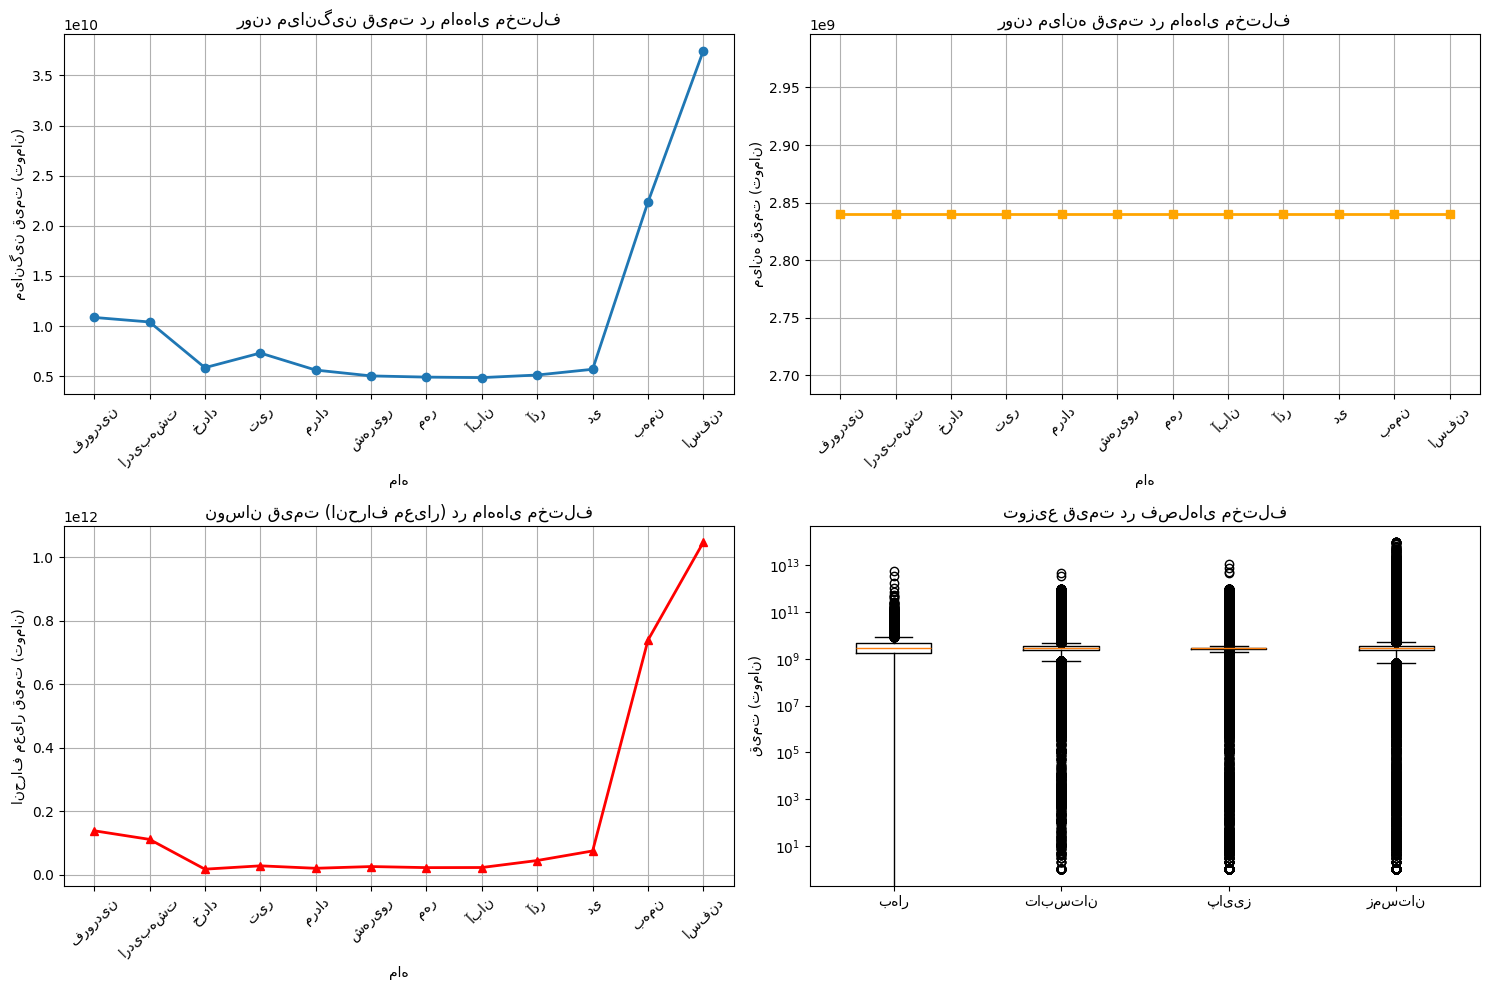


 آمار خلاصه روند قیمت:
  فروردین:
    میانگین: 10,861,432,486 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 2,099

  اردیبهشت:
    میانگین: 10,408,217,891 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 1,380

  خرداد:
    میانگین: 5,848,574,280 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 1,912

  تیر:
    میانگین: 7,309,438,395 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 7,215

  مرداد:
    میانگین: 5,610,725,699 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 108,820

  شهریور:
    میانگین: 5,028,172,230 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 125,695

  مهر:
    میانگین: 4,906,872,823 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 133,319

  آبان:
    میانگین: 4,857,172,082 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 132,522

  آذر:
    میانگین: 5,117,671,013 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 121,615

  دی:
    میانگین: 5,689,046,870 تومان
    میانه: 2,840,000,000 تومان
    تعداد آگهی: 126,606

  بهمن

In [46]:

print("\n تحلیل روند قیمت:")
print("=" * 50)

# روند قیمت در ماه‌های مختلف
monthly_price_stats = df.groupby(df['created_at_month'].dt.month)['price_value'].agg(['mean', 'median', 'std'])

plt.figure(figsize=(15, 10))

# نمودار 1: روند میانگین قیمت
plt.subplot(2, 2, 1)
plt.plot(monthly_price_stats.index, monthly_price_stats['mean'], marker='o', linewidth=2)
plt.title('روند میانگین قیمت در ماه‌های مختلف')
plt.xlabel('ماه')
plt.ylabel('میانگین قیمت (تومان)')
plt.xticks(range(1, 13), [persian_months[i] for i in range(1, 13)], rotation=45)
plt.grid(True)

# نمودار 2: روند میانه قیمت
plt.subplot(2, 2, 2)
plt.plot(monthly_price_stats.index, monthly_price_stats['median'], marker='s', linewidth=2, color='orange')
plt.title('روند میانه قیمت در ماه‌های مختلف')
plt.xlabel('ماه')
plt.ylabel('میانه قیمت (تومان)')
plt.xticks(range(1, 13), [persian_months[i] for i in range(1, 13)], rotation=45)
plt.grid(True)

# نمودار 3: نوسان قیمت (انحراف معیار)
plt.subplot(2, 2, 3)
plt.plot(monthly_price_stats.index, monthly_price_stats['std'], marker='^', linewidth=2, color='red')
plt.title('نوسان قیمت (انحراف معیار) در ماه‌های مختلف')
plt.xlabel('ماه')
plt.ylabel('انحراف معیار قیمت (تومان)')
plt.xticks(range(1, 13), [persian_months[i] for i in range(1, 13)], rotation=45)
plt.grid(True)

# نمودار 4: Box Plot قیمت در فصل‌های مختلف
plt.subplot(2, 2, 4)
season_price_data = [df[df['season'] == season]['price_value'] for season in [1, 2, 3, 4]]
plt.boxplot(season_price_data, labels=['بهار', 'تابستان', 'پاییز', 'زمستان'])
plt.title('توزیع قیمت در فصل‌های مختلف')
plt.ylabel('قیمت (تومان)')
plt.yscale('log')

plt.tight_layout()
plt.show()

# آمار خلاصه روند قیمت
print("\n آمار خلاصه روند قیمت:")
print("=" * 40)
for month in range(1, 13):
    month_data = df[df['created_at_month'].dt.month == month]['price_value']
    print(f"  {persian_months[month]}:")
    print(f"    میانگین: {month_data.mean():,.0f} تومان")
    print(f"    میانه: {month_data.median():,.0f} تومان")
    print(f"    تعداد آگهی: {len(month_data):,}")
    print()

## امکانات پرطرفدار

### تحلیل امکانات پرطرفدار

 تحلیل امکانات پرطرفدار:
�� امکانات پرطرفدار (بر اساس درصد):
 1. has_warehouse: 582,313 آگهی (58.2%)
 2. has_parking: 552,542 آگهی (55.3%)
 3. has_balcony: 412,788 آگهی (41.3%)
 4. has_restroom: 406,285 آگهی (40.6%)
 5. has_warm_water_provider: 378,118 آگهی (37.8%)
 6. has_heating_system: 365,851 آگهی (36.6%)
 7. has_elevator: 365,148 آگهی (36.5%)
 8. has_cooling_system: 344,702 آگهی (34.5%)
 9. has_barbecue: 7,821 آگهی (0.8%)
10. has_security_guard: 6,681 آگهی (0.7%)
11. has_pool: 3,721 آگهی (0.4%)
12. has_jacuzzi: 2,273 آگهی (0.2%)
13. has_sauna: 1,395 آگهی (0.1%)


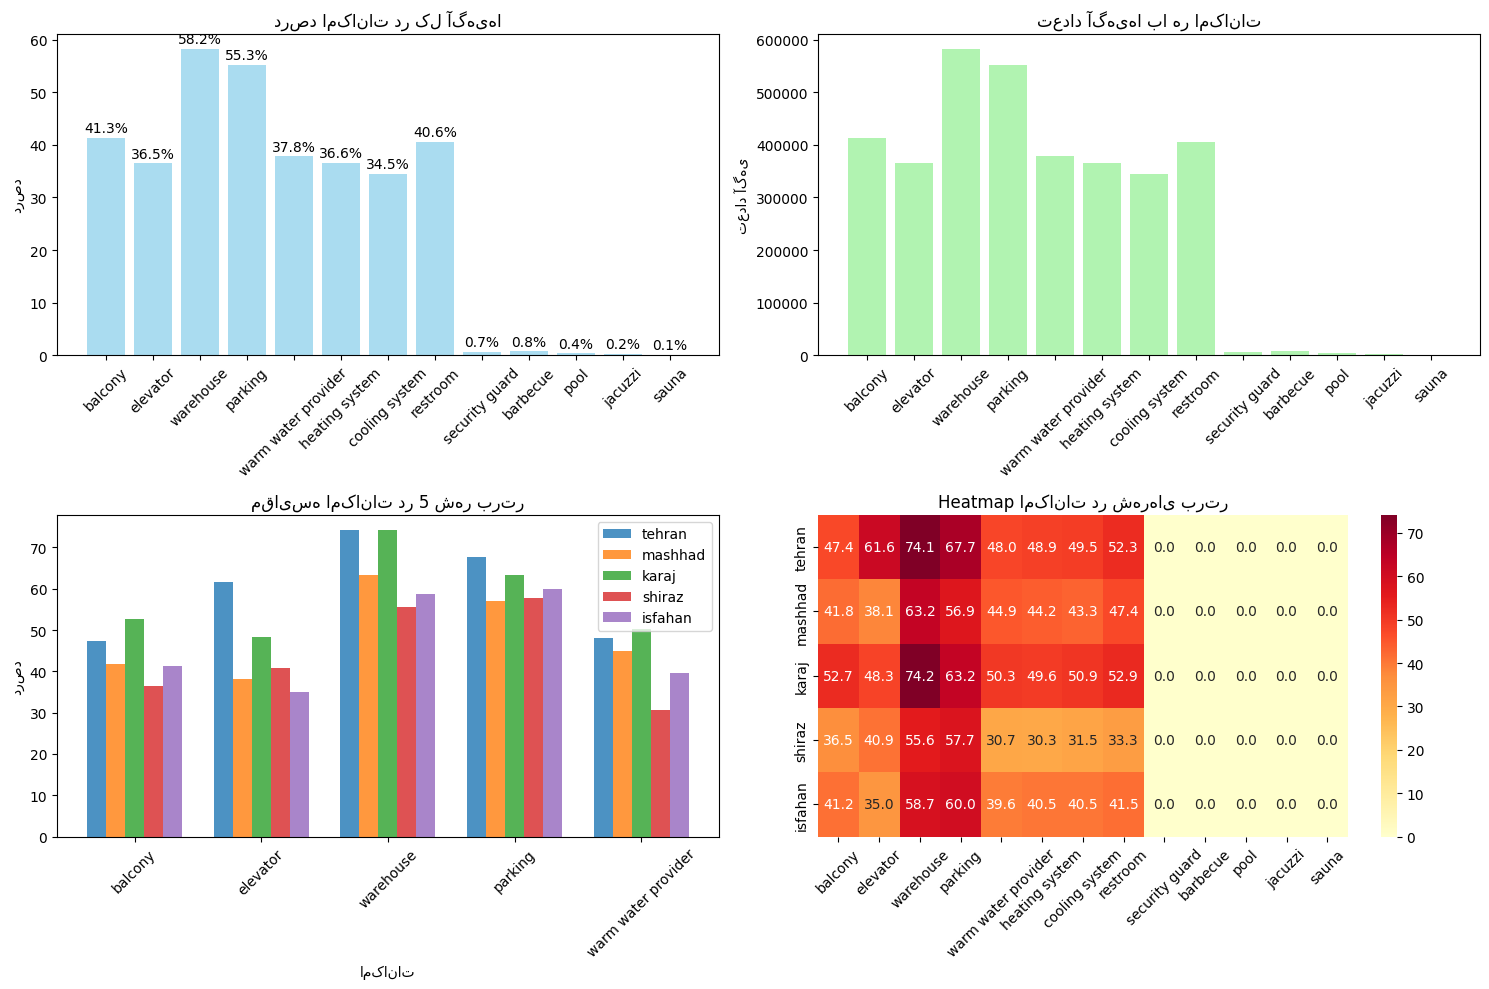

In [ ]:
print(" تحلیل امکانات پرطرفدار:")
print("=" * 50)

# لیست امکانات
amenities = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
             'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
             'has_restroom', 'has_security_guard', 'has_barbecue', 'has_pool',
             'has_jacuzzi', 'has_sauna']

# محاسبه درصد هر امکانات
amenity_stats = {}
for amenity in amenities:
    total_count = len(df)
    amenity_count = df[amenity].sum()
    percentage = (amenity_count / total_count) * 100
    
    amenity_stats[amenity] = {
        'count': amenity_count,
        'percentage': percentage
    }

# مرتب‌سازی بر اساس درصد
sorted_amenities = sorted(amenity_stats.items(), key=lambda x: x[1]['percentage'], reverse=True)

print("امکانات پرطرفدار (بر اساس درصد):")
for i, (amenity, stats) in enumerate(sorted_amenities, 1):
    print(f"{i:2d}. {amenity}: {stats['count']:,} آگهی ({stats['percentage']:.1f}%)")

# نمودار امکانات پرطرفدار
plt.figure(figsize=(15, 10))

# نمودار 1: درصد امکانات
plt.subplot(2, 2, 1)
amenity_names = [amenity.replace('has_', '').replace('_', ' ') for amenity in amenities]
percentages = [stats['percentage'] for stats in amenity_stats.values()]

bars = plt.bar(amenity_names, percentages, color='skyblue', alpha=0.7)
plt.title('درصد امکانات در کل آگهی‌ها')
plt.ylabel('درصد')
plt.xticks(rotation=45)

# اضافه کردن درصد روی نمودار
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{percentage:.1f}%', ha='center', va='bottom')

# نمودار 2: تعداد امکانات
plt.subplot(2, 2, 2)
counts = [stats['count'] for stats in amenity_stats.values()]
plt.bar(amenity_names, counts, color='lightgreen', alpha=0.7)
plt.title('تعداد آگهی‌ها با هر امکانات')
plt.ylabel('تعداد آگهی')
plt.xticks(rotation=45)

# نمودار 3: مقایسه امکانات در شهرهای برتر
plt.subplot(2, 2, 3)
top_5_cities = df['city_slug'].value_counts().head(5).index

city_amenity_data = []
for city in top_5_cities:
    city_data = df[df['city_slug'] == city]
    city_percentages = []
    for amenity in amenities[:5]:  # فقط 5 امکانات اول
        percentage = (city_data[amenity].sum() / len(city_data)) * 100
        city_percentages.append(percentage)
    city_amenity_data.append(city_percentages)

city_amenity_data = np.array(city_amenity_data)
x = np.arange(len(amenities[:5]))
width = 0.15

for i, city in enumerate(top_5_cities):
    plt.bar(x + i*width, city_amenity_data[i], width, label=city, alpha=0.8)

plt.xlabel('امکانات')
plt.ylabel('درصد')
plt.title('مقایسه امکانات در 5 شهر برتر')
plt.xticks(x + width*2, [name.replace('has_', '').replace('_', ' ') for name in amenities[:5]], rotation=45)
plt.legend()

# نمودار 4: Heatmap امکانات در شهرهای برتر
plt.subplot(2, 2, 4)
amenity_matrix = []
for city in top_5_cities:
    city_data = df[df['city_slug'] == city]
    city_amenities = []
    for amenity in amenities:
        percentage = (city_data[amenity].sum() / len(city_data)) * 100
        city_amenities.append(percentage)
    amenity_matrix.append(city_amenities)

sns.heatmap(amenity_matrix, 
            xticklabels=[name.replace('has_', '').replace('_', ' ') for name in amenities], 
            yticklabels=top_5_cities,
            annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap امکانات در شهرهای برتر')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### تحلیل تأثیر امکانات بر قیمت


💰 تأثیر امکانات بر قیمت:
🏆 تأثیر امکانات بر قیمت (بر اساس درصد):
 1. has_sauna:
    با امکانات: 23,608,130,203 تومان
    بدون امکانات: 11,077,956,710 تومان
    تأثیر: 12,530,173,493 تومان (+113.1% افزایش)
    تعداد با امکانات: 1,395
    تعداد بدون امکانات: 998,605

 2. has_jacuzzi:
    با امکانات: 17,881,141,962 تومان
    بدون امکانات: 11,079,977,255 تومان
    تأثیر: 6,801,164,707 تومان (+61.4% افزایش)
    تعداد با امکانات: 2,273
    تعداد بدون امکانات: 997,727

 3. has_security_guard:
    با امکانات: 5,305,240,858 تومان
    بدون امکانات: 11,134,380,786 تومان
    تأثیر: -5,829,139,927 تومان (-52.4% کاهش)
    تعداد با امکانات: 6,681
    تعداد بدون امکانات: 993,319

 4. has_barbecue:
    با امکانات: 6,942,736,274 تومان
    بدون امکانات: 11,128,170,584 تومان
    تأثیر: -4,185,434,309 تومان (-37.6% کاهش)
    تعداد با امکانات: 7,821
    تعداد بدون امکانات: 992,179

 5. has_pool:
    با امکانات: 7,116,673,164 تومان
    بدون امکانات: 11,110,296,575 تومان
    تأثیر: -3,993,623,411 تومان (-35.

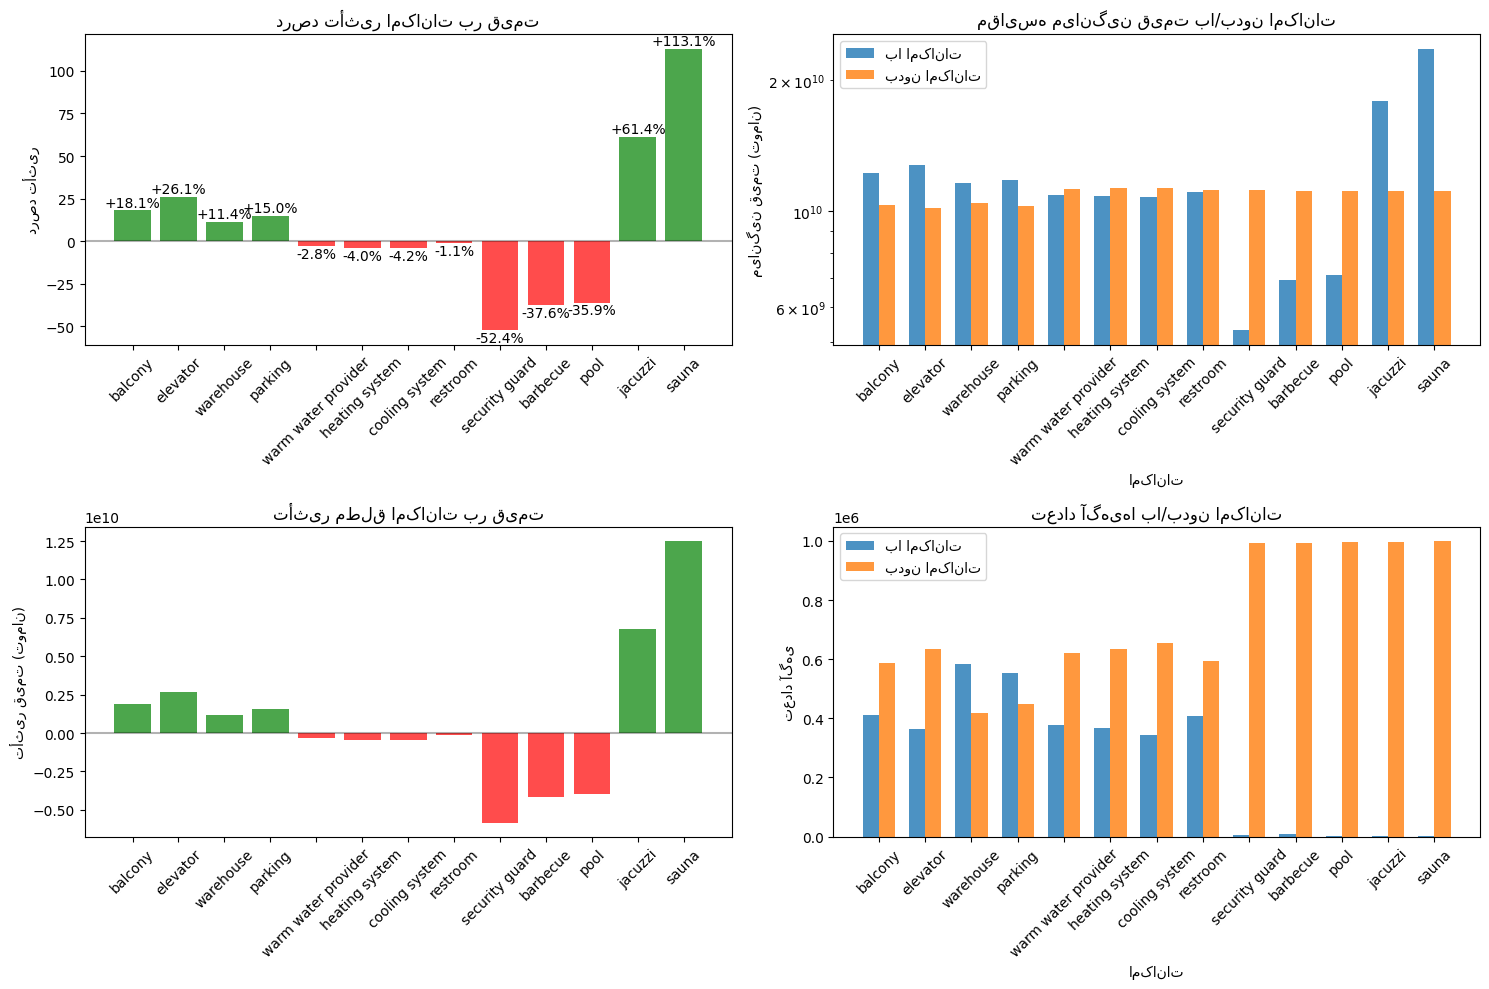

In [ ]:
print("\n تأثیر امکانات بر قیمت:")
print("=" * 50)

# محاسبه تأثیر هر امکانات بر قیمت
amenity_price_impact = {}
for amenity in amenities:
    with_amenity = df[df[amenity] == 1]['price_value']
    without_amenity = df[df[amenity] == 0]['price_value']
    
    mean_with = with_amenity.mean()
    mean_without = without_amenity.mean()
    median_with = with_amenity.median()
    median_without = without_amenity.median()
    
    price_impact = mean_with - mean_without
    percentage_impact = (price_impact / mean_without) * 100 if mean_without > 0 else 0
    
    amenity_price_impact[amenity] = {
        'mean_with': mean_with,
        'mean_without': mean_without,
        'median_with': median_with,
        'median_without': median_without,
        'price_impact': price_impact,
        'percentage_impact': percentage_impact,
        'count_with': len(with_amenity),
        'count_without': len(without_amenity)
    }

# مرتب‌سازی بر اساس تأثیر قیمت
sorted_impact = sorted(amenity_price_impact.items(), key=lambda x: abs(x[1]['percentage_impact']), reverse=True)

print(" تأثیر امکانات بر قیمت (بر اساس درصد):")
for i, (amenity, impact) in enumerate(sorted_impact, 1):
    direction = "افزایش" if impact['percentage_impact'] > 0 else "کاهش"
    print(f"{i:2d}. {amenity}:")
    print(f"    با امکانات: {impact['mean_with']:,.0f} تومان")
    print(f"    بدون امکانات: {impact['mean_without']:,.0f} تومان")
    print(f"    تأثیر: {impact['price_impact']:,.0f} تومان ({impact['percentage_impact']:+.1f}% {direction})")
    print(f"    تعداد با امکانات: {impact['count_with']:,}")
    print(f"    تعداد بدون امکانات: {impact['count_without']:,}")
    print()

# نمودار تأثیر امکانات بر قیمت
plt.figure(figsize=(15, 10))

# نمودار 1: درصد تأثیر امکانات
plt.subplot(2, 2, 1)
impact_percentages = [impact['percentage_impact'] for impact in amenity_price_impact.values()]
colors = ['green' if p > 0 else 'red' for p in impact_percentages]

bars = plt.bar(amenity_names, impact_percentages, color=colors, alpha=0.7)
plt.title('درصد تأثیر امکانات بر قیمت')
plt.ylabel('درصد تأثیر')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# اضافه کردن درصد روی نمودار
for bar, percentage in zip(bars, impact_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.5 if percentage > 0 else -0.5), 
             f'{percentage:+.1f}%', ha='center', va='bottom' if percentage > 0 else 'top')

# نمودار 2: مقایسه میانگین قیمت
plt.subplot(2, 2, 2)
with_prices = [impact['mean_with'] for impact in amenity_price_impact.values()]
without_prices = [impact['mean_without'] for impact in amenity_price_impact.values()]

x = np.arange(len(amenities))
width = 0.35

plt.bar(x - width/2, with_prices, width, label='با امکانات', alpha=0.8)
plt.bar(x + width/2, without_prices, width, label='بدون امکانات', alpha=0.8)
plt.xlabel('امکانات')
plt.ylabel('میانگین قیمت (تومان)')
plt.title('مقایسه میانگین قیمت با/بدون امکانات')
plt.xticks(x, amenity_names, rotation=45)
plt.legend()
plt.yscale('log')

# نمودار 3: تأثیر مطلق قیمت
plt.subplot(2, 2, 3)
absolute_impacts = [impact['price_impact'] for impact in amenity_price_impact.values()]
colors = ['green' if p > 0 else 'red' for p in absolute_impacts]

plt.bar(amenity_names, absolute_impacts, color=colors, alpha=0.7)
plt.title('تأثیر مطلق امکانات بر قیمت')
plt.ylabel('تأثیر قیمت (تومان)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# نمودار 4: تعداد آگهی‌ها با/بدون امکانات
plt.subplot(2, 2, 4)
with_counts = [impact['count_with'] for impact in amenity_price_impact.values()]
without_counts = [impact['count_without'] for impact in amenity_price_impact.values()]

plt.bar(x - width/2, with_counts, width, label='با امکانات', alpha=0.8)
plt.bar(x + width/2, without_counts, width, label='بدون امکانات', alpha=0.8)
plt.xlabel('امکانات')
plt.ylabel('تعداد آگهی')
plt.title('تعداد آگهی‌ها با/بدون امکانات')
plt.xticks(x, amenity_names, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### تحلیل ترکیب امکانات


 تحلیل ترکیب امکانات:
 توزیع تعداد امکانات:
  0 امکانات: 295,514 آگهی (29.6%)
  1 امکانات: 48,470 آگهی (4.8%)
  2 امکانات: 77,744 آگهی (7.8%)
  3 امکانات: 166,967 آگهی (16.7%)
  4 امکانات: 38,483 آگهی (3.8%)
  5 امکانات: 54,998 آگهی (5.5%)
  6 امکانات: 74,118 آگهی (7.4%)
  7 امکانات: 105,422 آگهی (10.5%)
  8 امکانات: 134,464 آگهی (13.4%)
  9 امکانات: 2,231 آگهی (0.2%)
  10 امکانات: 663 آگهی (0.1%)
  11 امکانات: 338 آگهی (0.0%)
  12 امکانات: 588 آگهی (0.1%)


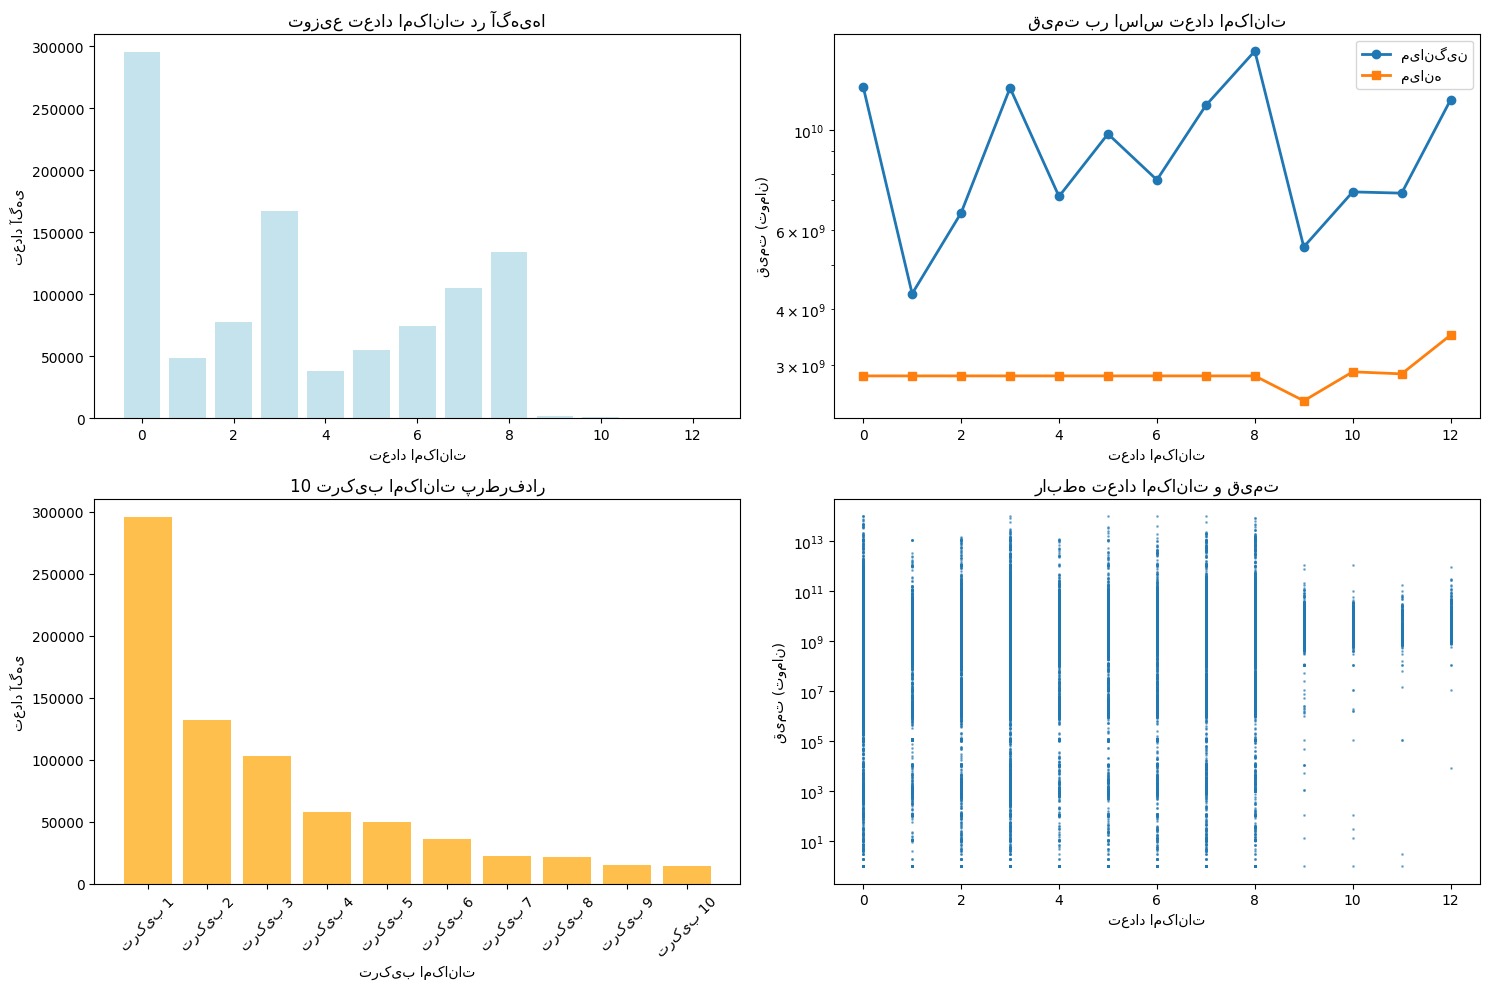


🏆 ترکیب‌های امکانات پرطرفدار:
1. (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): 295,514 آگهی (29.6%)
2. (1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0): 132,413 آگهی (13.2%)
3. (0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 103,169 آگهی (10.3%)
4. (1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0): 57,497 آگهی (5.7%)
5. (1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): 49,571 آگهی (5.0%)

�� قیمت ترکیب‌های خاص:
1. (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0):
   میانگین قیمت: 12,468,103,775 تومان
   میانه قیمت: 2,840,000,000 تومان
   تعداد آگهی: 295,514

2. (1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0):
   میانگین قیمت: 15,025,261,726 تومان
   میانه قیمت: 2,840,000,000 تومان
   تعداد آگهی: 132,413

3. (0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0):
   میانگین قیمت: 12,942,274,604 تومان
   میانه قیمت: 2,840,000,000 تومان
   تعداد آگهی: 103,169

4. (1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0):
   میانگین قیمت: 11,383,018,221 تومان
   میانه قیمت: 2,840,000,000 تومان
   تعداد آگهی: 57,497

5. (1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0):
   میانگین قیمت: 

In [ ]:

print("\n تحلیل ترکیب امکانات:")
print("=" * 50)

# محاسبه تعداد امکانات هر آگهی
df['amenity_count'] = df[amenities].sum(axis=1)

print(" توزیع تعداد امکانات:")
amenity_count_stats = df['amenity_count'].value_counts().sort_index()
for count, freq in amenity_count_stats.items():
    percentage = (freq / len(df)) * 100
    print(f"  {count} امکانات: {freq:,} آگهی ({percentage:.1f}%)")

# نمودار توزیع تعداد امکانات
plt.figure(figsize=(15, 10))

# نمودار 1: توزیع تعداد امکانات
plt.subplot(2, 2, 1)
plt.bar(amenity_count_stats.index, amenity_count_stats.values, color='lightblue', alpha=0.7)
plt.title('توزیع تعداد امکانات در آگهی‌ها')
plt.xlabel('تعداد امکانات')
plt.ylabel('تعداد آگهی')

# نمودار 2: قیمت بر اساس تعداد امکانات
plt.subplot(2, 2, 2)
amenity_price_stats = df.groupby('amenity_count')['price_value'].agg(['mean', 'median', 'count'])
plt.plot(amenity_price_stats.index, amenity_price_stats['mean'], marker='o', linewidth=2, label='میانگین')
plt.plot(amenity_price_stats.index, amenity_price_stats['median'], marker='s', linewidth=2, label='میانه')
plt.title('قیمت بر اساس تعداد امکانات')
plt.xlabel('تعداد امکانات')
plt.ylabel('قیمت (تومان)')
plt.legend()
plt.yscale('log')

# نمودار 3: ترکیب‌های پرطرفدار
plt.subplot(2, 2, 3)
# پیدا کردن ترکیب‌های پرطرفدار
amenity_combinations = df[amenities].apply(tuple, axis=1).value_counts().head(10)
combination_names = [f"ترکیب {i+1}" for i in range(len(amenity_combinations))]
plt.bar(range(len(amenity_combinations)), amenity_combinations.values, color='orange', alpha=0.7)
plt.title('10 ترکیب امکانات پرطرفدار')
plt.xlabel('ترکیب امکانات')
plt.ylabel('تعداد آگهی')
plt.xticks(range(len(amenity_combinations)), combination_names, rotation=45)

# نمودار 4: تأثیر تعداد امکانات بر قیمت
plt.subplot(2, 2, 4)
plt.scatter(df['amenity_count'], df['price_value'], alpha=0.5, s=1)
plt.xlabel('تعداد امکانات')
plt.ylabel('قیمت (تومان)')
plt.title('رابطه تعداد امکانات و قیمت')
plt.yscale('log')

plt.tight_layout()
plt.show()

# تحلیل ترکیب‌های خاص
print("\n ترکیب‌های امکانات پرطرفدار:")
print("=" * 40)
for i, (combination, count) in enumerate(amenity_combinations.head(5).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. {combination}: {count:,} آگهی ({percentage:.1f}%)")

# تحلیل قیمت ترکیب‌های خاص
print("\n قیمت ترکیب‌های خاص:")
print("=" * 30)
for i, (combination, count) in enumerate(amenity_combinations.head(5).items(), 1):
    # پیدا کردن آگهی‌هایی با این ترکیب
    mask = df[amenities].apply(tuple, axis=1) == combination
    combination_data = df[mask]
    
    if len(combination_data) > 0:
        avg_price = combination_data['price_value'].mean()
        median_price = combination_data['price_value'].median()
        print(f"{i}. {combination}:")
        print(f"   میانگین قیمت: {avg_price:,.0f} تومان")
        print(f"   میانه قیمت: {median_price:,.0f} تومان")
        print(f"   تعداد آگهی: {len(combination_data):,}")
        print()

## تحلیل هایه اخریه 

### Heatmap ساده برای تمام داده‌های عددی و بولین

🔥 Heatmap ساده برای تمام داده‌ها:
�� تعداد ستون‌های عددی: 30
ستون‌های انتخاب شده:
  1. rent_value
  2. price_value
  3. credit_value
  4. rent_credit_transform
  5. transformable_credit
  6. transformed_credit
  7. transformable_rent
  8. transformed_rent
  9. land_size
  10. building_size
  11. floor
  12. rooms_count
  13. total_floors_count
  14. has_balcony
  15. has_elevator
  16. has_warehouse
  17. has_parking
  18. construction_year
  19. is_rebuilt
  20. has_warm_water_provider
  21. has_heating_system
  22. has_cooling_system
  23. has_restroom
  24. has_security_guard
  25. has_barbecue
  26. has_pool
  27. has_jacuzzi
  28. has_sauna
  29. season
  30. amenity_count


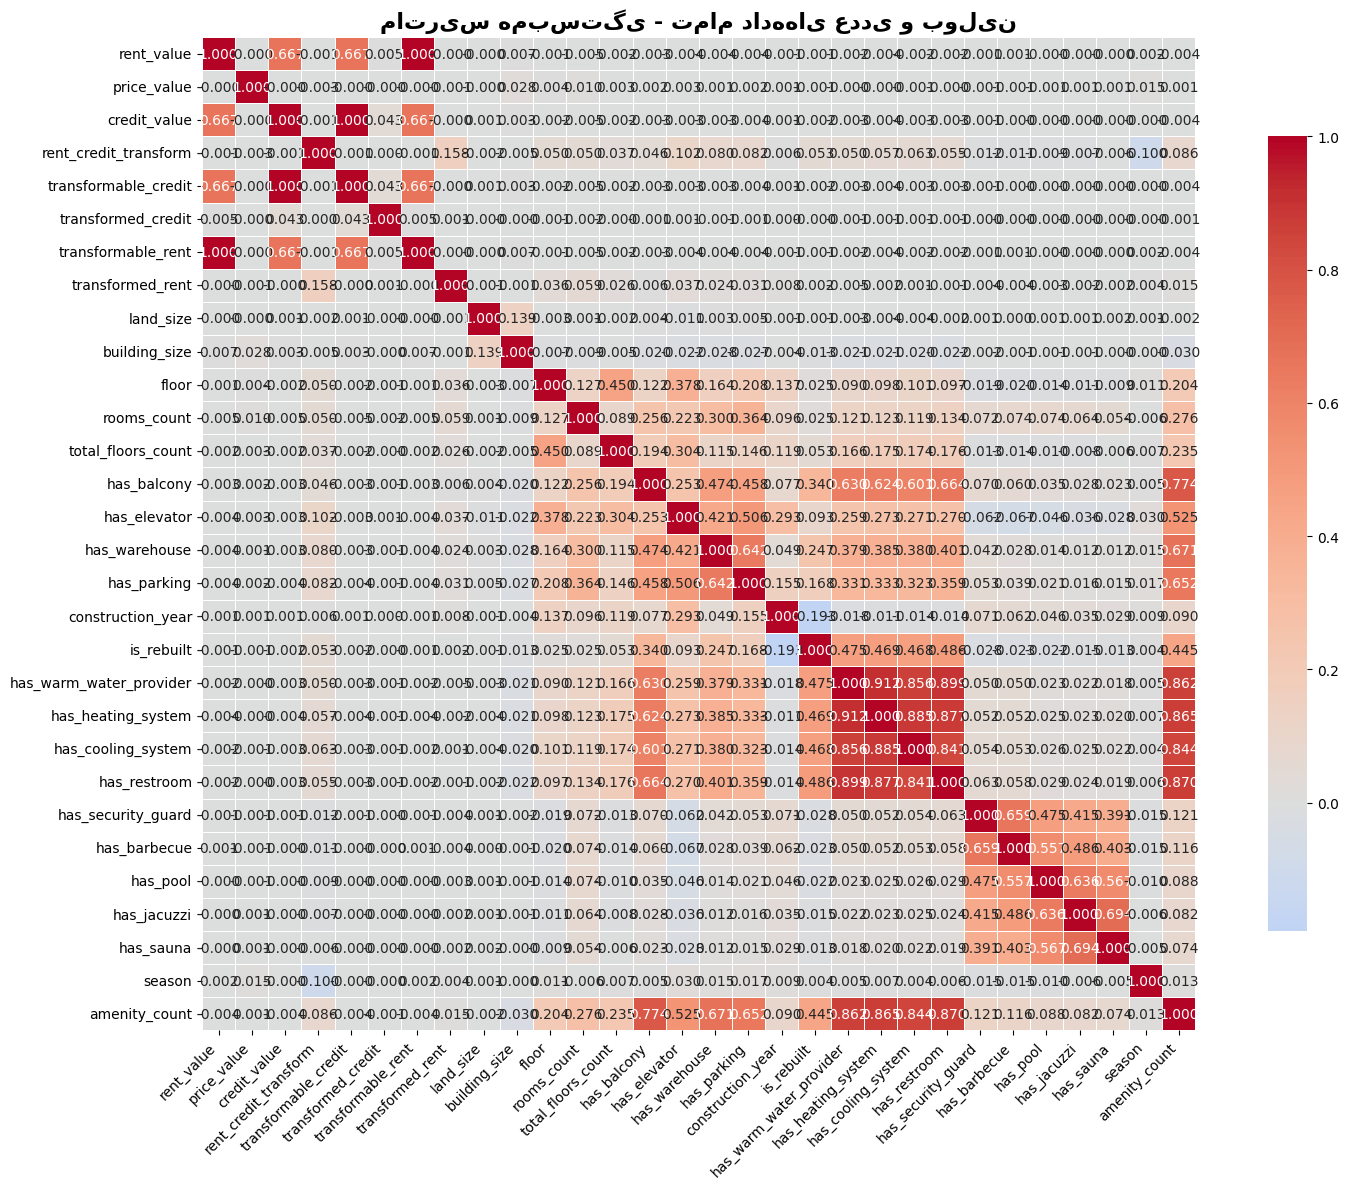


🔗 همبستگی‌های قوی (بالای 0.5 یا زیر -0.5):
  rent_value ↔ transformable_rent: 1.000
  credit_value ↔ transformable_credit: 1.000
  has_warm_water_provider ↔ has_heating_system: 0.912
  has_warm_water_provider ↔ has_restroom: 0.899
  has_heating_system ↔ has_cooling_system: 0.885
  has_heating_system ↔ has_restroom: 0.877
  has_restroom ↔ amenity_count: 0.870
  has_heating_system ↔ amenity_count: 0.865
  has_warm_water_provider ↔ amenity_count: 0.862
  has_warm_water_provider ↔ has_cooling_system: 0.856


In [ ]:
print(" Heatmap ساده برای تمام داده‌ها:")
print("=" * 50)

# انتخاب تمام ستون‌های عددی و بولین
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int8', 'int16', 'int32', 'uint8', 'uint16', 'uint32', 'uint64']).columns.tolist()

print(f" تعداد ستون‌های عددی: {len(numeric_columns)}")
print("ستون‌های انتخاب شده:")
for i, col in enumerate(numeric_columns, 1):
    print(f"  {i}. {col}")

# ایجاد ماتریس همبستگی
correlation_matrix = df[numeric_columns].corr()

# نمودار Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f', cbar_kws={'shrink': 0.8}, linewidths=0.5)       

plt.title('ماتریس همبستگی - تمام داده‌های عددی و بولین', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # چرخش برچسب‌ها
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# نمایش همبستگی‌های قوی
print("\n همبستگی‌های قوی (بالای 0.5 یا زیر -0.5):")
print("=" * 50)

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            strong_correlations.append((col1, col2, corr_value))

# مرتب‌سازی بر اساس قدر مطلق همبستگی
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for col1, col2, corr in strong_correlations[:10]:
    print(f"  {col1} ↔ {col2}: {corr:.3f}")